In [7]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd
import calendar  # Import calendar module to get month names

# Load fire data from CSV
file_path = r"Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\mtbs_FODpoints.csv"
fire_data = pd.read_csv(file_path)

# Convert Ig_Date to datetime
fire_data['Ig_Date'] = pd.to_datetime(fire_data['Ig_Date'])

# Extract Year, Month, and WeekNum
fire_data['Year'] = fire_data['Ig_Date'].dt.year
fire_data['Month'] = fire_data['Ig_Date'].dt.month
fire_data['WeekNum'] = fire_data['Ig_Date'].dt.isocalendar().week

# Get unique years and sort them in descending order
unique_years = sorted(fire_data['Year'].unique(), reverse=True)

# Create Dash app
app = dash.Dash(__name__)

# Load the study area shapefile
study_area = gpd.read_file("Z:\\dshrestha\\Projects\\VegDRI-QuickDRI-Fire\\Data\\EAG_StudyArea.shp")

# Define month names dictionary
month_names = {i: calendar.month_name[i] for i in range(1, 13)}

# Define app layout
app.layout = html.Div([
    html.H1("Fire Dashboard"),

    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': str(year), 'value': year} for year in unique_years],
        value=unique_years[0],  # Set default value to the latest year in the dataset
        multi=False
    ),

    dcc.Dropdown(
        id='month-dropdown',
        options=[{'label': month_names[month], 'value': month} for month in fire_data['Month'].unique()],
        value=1,  # Set default value to January
        multi=False
    ),

    dcc.Graph(id='fire-map'),

    #dcc.Graph(id='fire-stats'),

    #dcc.Graph(id='monthly-fires'),

    #dcc.Graph(id='ecoregion-fires')
])

# Define callback to update map
@app.callback(
    Output('fire-map', 'figure'),
    [Input('year-dropdown', 'value'),
     Input('month-dropdown', 'value')]
)
def update_map(selected_year, selected_month):
    filtered_data = fire_data[(fire_data['Year'] == selected_year) & (fire_data['Month'] == selected_month)]
    # Create map visualization using Plotly
    # Replace this with your actual map visualization
    fig = px.scatter_mapbox(filtered_data, lat="BurnBndLat", lon="BurnBndLon", hover_name="Incid_Name",
                            zoom=5, mapbox_style="carto-positron")
    return fig

# Define callback to update stats
# Similar callbacks can be defined for other visualizations

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


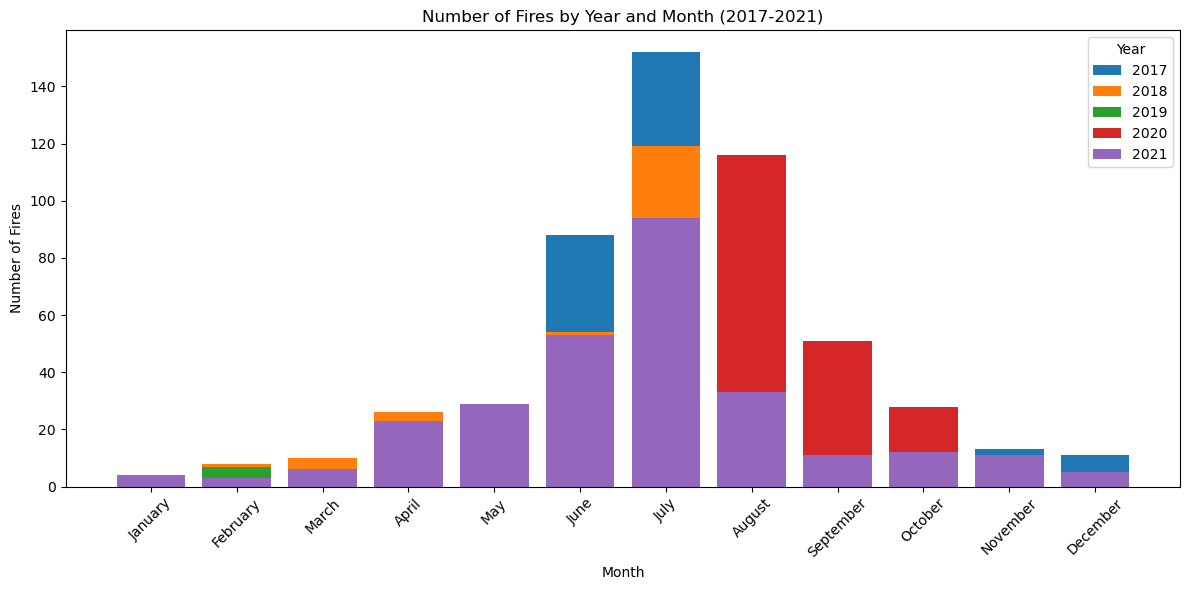

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load fire data from CSV
file_path = r"Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\mtbs_FODpoints.csv"
fire_data = pd.read_csv(file_path)

# Convert Ig_Date to datetime
fire_data['Ig_Date'] = pd.to_datetime(fire_data['Ig_Date'])

# Extract Year and Month
fire_data['Year'] = fire_data['Ig_Date'].dt.year
fire_data['Month'] = fire_data['Ig_Date'].dt.month

# Filter fire data for years 2017 to 2021
filtered_fire_data = fire_data[(fire_data['Year'] >= 2017) & (fire_data['Year'] <= 2021)]

# Group data by Year and Month and calculate count of fires for each combination
grouped_data = filtered_fire_data.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Adjust layout and show plot
output_folder = r'Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\plots'
os.makedirs(output_folder, exist_ok=True)

# Plot non-stacked bar chart
plt.figure(figsize=(12, 6))
for year in grouped_data.index:
    plt.bar(grouped_data.columns, grouped_data.loc[year], label=str(year))

plt.title('Number of Fires by Year and Month (2017-2021)')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.legend(title='Year')

# Define burnarea
fireoccurances = 'Total_FireNumbers_byYearandMonth_2017_21'  # replace with your desired file name
file_name = f'{fireoccurances}.png'
file_path = os.path.join(output_folder, file_name)
plt.savefig(file_path)

plt.tight_layout()
plt.show()
plt.close()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load fire data from CSV
file_path = r"Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\mtbs_FODpoints.csv"
fire_data = pd.read_csv(file_path)

# Convert Ig_Date to datetime
fire_data['Ig_Date'] = pd.to_datetime(fire_data['Ig_Date'])

# Extract Year and Month
fire_data['Year'] = fire_data['Ig_Date'].dt.year
fire_data['Month'] = fire_data['Ig_Date'].dt.month

# Filter fire data for years 2017 to 2021
filtered_fire_data = fire_data[(fire_data['Year'] >= 2017) & (fire_data['Year'] <= 2021)]

# Group data by Year and Month and calculate count of fires for each combination
grouped_data = filtered_fire_data.groupby(['Year', 'Month']).size().unstack(fill_value=0)
grouped_data



Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2017,0,3,10,7,20,88,152,108,32,17,13,11
2018,1,8,10,26,20,54,119,75,35,13,7,0
2019,0,7,6,14,12,33,65,56,30,25,7,0
2020,0,3,2,3,18,50,73,116,51,28,5,4
2021,4,3,6,23,29,53,94,33,11,12,11,5


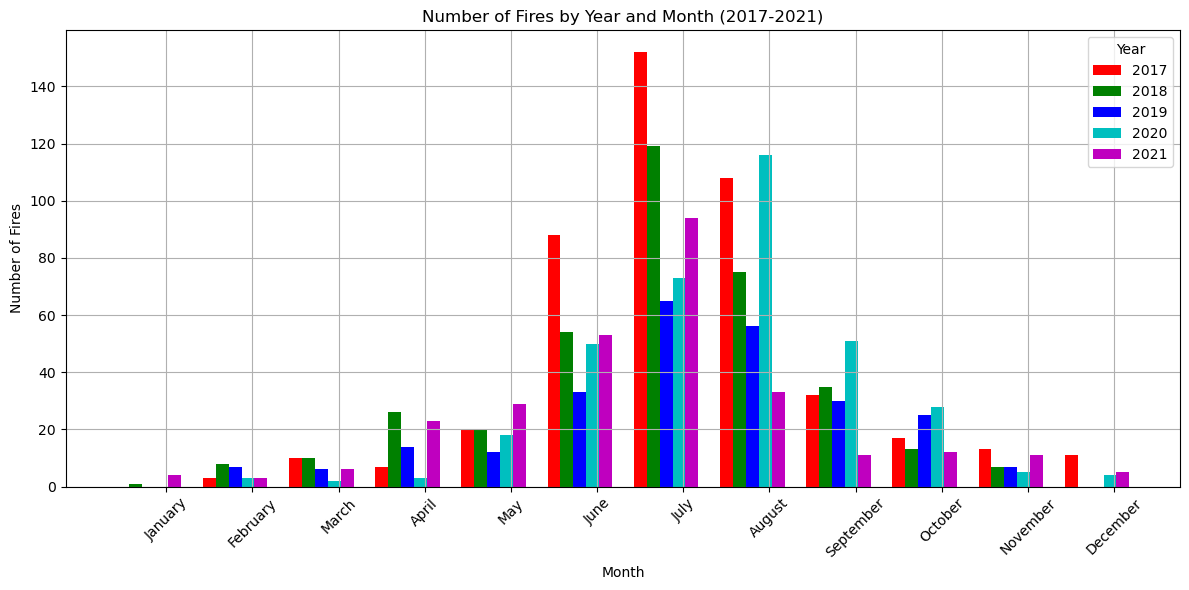

In [32]:
# Create a clustered column chart
plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(1, 13)
colors = ['r', 'g', 'b', 'c', 'm']  # Color for each year

for i, year in enumerate(grouped_data.index):
    plt.bar(index + i * bar_width, grouped_data.loc[year], bar_width, label=str(year), color=colors[i])

plt.title('Number of Fires by Year and Month (2017-2021)')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.xticks(index + 0.5, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.legend(title='Year')
plt.grid()

# Adjust layout and show plot
output_folder = r'Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\plots'
os.makedirs(output_folder, exist_ok=True)

# Define burnarea
fireoccurances = 'Total_FireOccurances_byYearandMonth_2017_21'  # replace with your desired file name
file_name = f'{fireoccurances}.png'
file_path = os.path.join(output_folder, file_name)
plt.savefig(file_path)
plt.tight_layout()
plt.show()
plt.close()


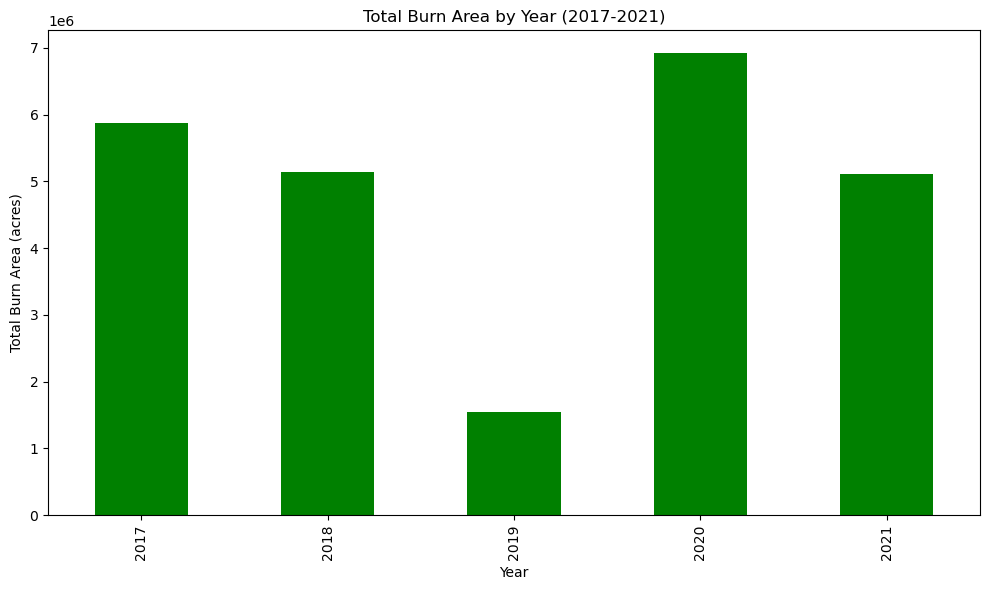

In [34]:
# Plot bar chart of total burn area by year
plt.figure(figsize=(10, 6))
total_burn_area_by_year = filtered_fire_data.groupby('Year')['BurnBndAc'].sum()
total_burn_area_by_year.plot(kind='bar', color='green')
plt.title('Total Burn Area by Year (2017-2021)')
plt.xlabel('Year')
plt.ylabel('Total Burn Area (acres)')
#plt.grid(True)

# Adjust layout and show plot
output_folder = r'Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\plots'
os.makedirs(output_folder, exist_ok=True)

# Define burnarea
fireoccurances = 'Total_BurnArea_byYear_2017_21'  # replace with your desired file name
file_name = f'{fireoccurances}.png'
file_path = os.path.join(output_folder, file_name)
plt.savefig(file_path)
plt.tight_layout()
plt.show()
plt.close()

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load fire data from CSV
file_path = r"Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\mtbs_FODpoints.csv"
fire_data = pd.read_csv(file_path)

# Convert Ig_Date to datetime
fire_data['Ig_Date'] = pd.to_datetime(fire_data['Ig_Date'])

# Extract Year and Month
fire_data['Year'] = fire_data['Ig_Date'].dt.year
fire_data['Month'] = fire_data['Ig_Date'].dt.month

# Convert burn area from acres to hectares
fire_data['BurnBndHect'] = fire_data['BurnBndAc'] * 0.404686

# Filter fire data for years 2017 to 2021
filtered_fire_data = fire_data[(fire_data['Year'] >= 2017) & (fire_data['Year'] <= 2021)]

# Group data by Year and Month and calculate total burn area for each combination
grouped_data = filtered_fire_data.groupby(['Year', 'Month'])['BurnBndHect'].sum().unstack(fill_value=0)

grouped_data



Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2017,0.000000,8757.809726,152036.078654,27491.534038,45983.256122,275666.032910,1.051641e+06,5.038308e+05,45843.234766,96989.070190,16877.024944,153001.659450
2018,3011.673212,9330.035730,32663.421118,100076.419684,49932.586796,252736.928836,9.681319e+05,4.015897e+05,137622.377392,17016.641614,109875.486488,0.000000
2019,0.000000,8011.164056,7139.470412,10195.254398,23591.170370,106303.727852,1.693465e+05,1.395645e+05,87514.561558,64928.631212,11131.293116,0.000000
2020,0.000000,2841.300406,11270.100414,1413.163512,50774.738362,326144.136434,2.870964e+05,1.188110e+06,781114.395364,133949.447256,10996.532678,5933.506132
2021,3003.174806,4350.779186,13172.529300,22797.581124,82820.203958,282147.079200,1.083003e+06,3.907502e+05,127629.061308,20593.256482,18853.106682,21096.685866


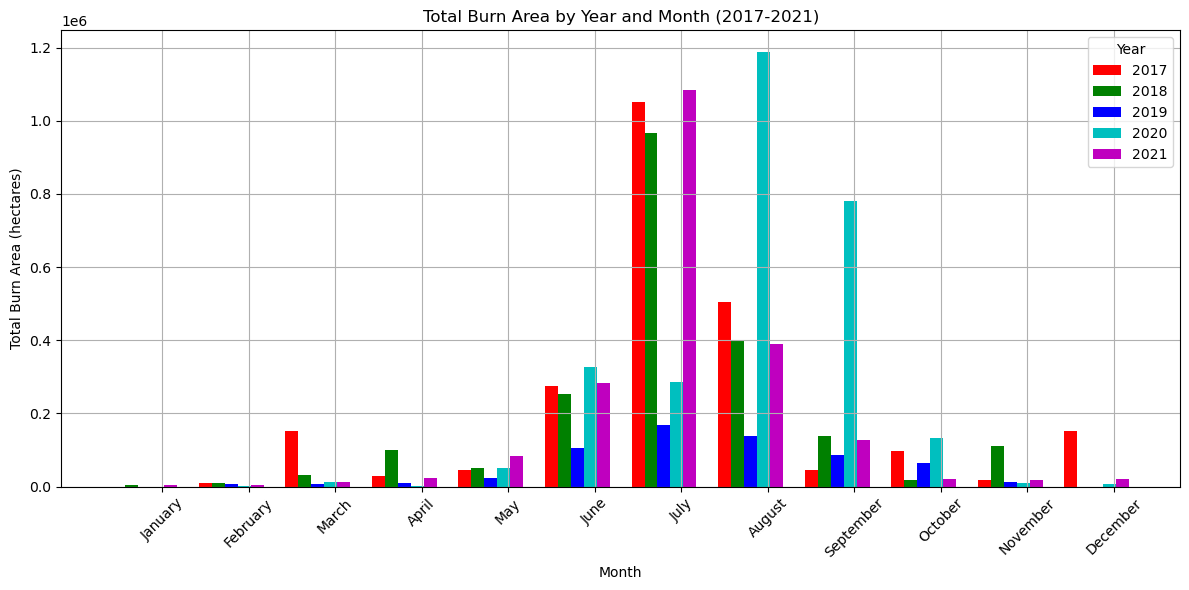

In [36]:
# Create a clustered column chart
plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(1, 13)
colors = ['r', 'g', 'b', 'c', 'm']  # Color for each year

for i, year in enumerate(grouped_data.index):
    plt.bar(index + i * bar_width, grouped_data.loc[year], bar_width, label=str(year), color=colors[i])

plt.title('Total Burn Area by Year and Month (2017-2021)')
plt.xlabel('Month')
plt.ylabel('Total Burn Area (hectares)')
plt.xticks(index + 0.5, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.legend(title='Year')
plt.grid()

# Adjust layout and show plot
output_folder = r'Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\plots'
os.makedirs(output_folder, exist_ok=True)

# Define burnarea
burnarea = 'Total_BurnArea_byYearandMonth_2017_21'  # replace with your desired file name

file_name = f'{burnarea}.png'

file_path = os.path.join(output_folder, file_name)
plt.savefig(file_path)

plt.tight_layout()
plt.show()
plt.close()

In [38]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load fire data from CSV
# file_path = r"Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\mtbs_FODpoints.csv"
# fire_data = pd.read_csv(file_path)

# # Convert Ig_Date to datetime
# fire_data['Ig_Date'] = pd.to_datetime(fire_data['Ig_Date'])

# # Filter data for the years 2017 to 2021
# fire_data = fire_data[(fire_data['Ig_Date'].dt.year >= 2017) & (fire_data['Ig_Date'].dt.year <= 2021)]

# # Group data by date and count the number of occurrences (fires)
# fires_by_date = fire_data.groupby('Ig_Date').size()

# # Plot time series of number of fires over time
# plt.figure(figsize=(12, 6))
# plt.plot(fires_by_date.index, fires_by_date.values, color='blue', linewidth=2)
# plt.title('Number of Fires Over Time (2017-2021)')
# plt.xlabel('Date')
# plt.ylabel('Number of Fires')
# plt.grid(True)
# plt.show()

In [37]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load fire data from CSV
# file_path = r"Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\mtbs_FODpoints.csv"
# fire_data = pd.read_csv(file_path)

# # Convert Ig_Date to datetime
# fire_data['Ig_Date'] = pd.to_datetime(fire_data['Ig_Date'])

# # Extract Year, Month, and WeekNum
# fire_data['Year'] = fire_data['Ig_Date'].dt.year
# fire_data['Month'] = fire_data['Ig_Date'].dt.month
# fire_data['WeekNum'] = fire_data['Ig_Date'].dt.isocalendar().week

# # Filter data for the years 2017 to 2021
# fire_data = fire_data[(fire_data['Ig_Date'].dt.year >= 2017) & (fire_data['Ig_Date'].dt.year <= 2021)]

# # Create a subplot of scatter plots for fire size vs WeekNum for each year
# fig, axs = plt.subplots(5, 1, figsize=(10, 20), sharex=True)

# # Plot scatter plot for each year
# for i, year in enumerate(range(2017, 2022)):
#     data_year = fire_data[fire_data['Year'] == year]
#     axs[i].scatter(data_year['WeekNum'], data_year['BurnBndAc'], alpha=0.5)
#     axs[i].set_title(f'Fire Size vs WeekNum - {year}')
#     axs[i].set_xlabel('WeekNum')
#     axs[i].set_ylabel('Fire Size (acres)')
#     axs[i].grid(True)

# plt.tight_layout()
# plt.show()


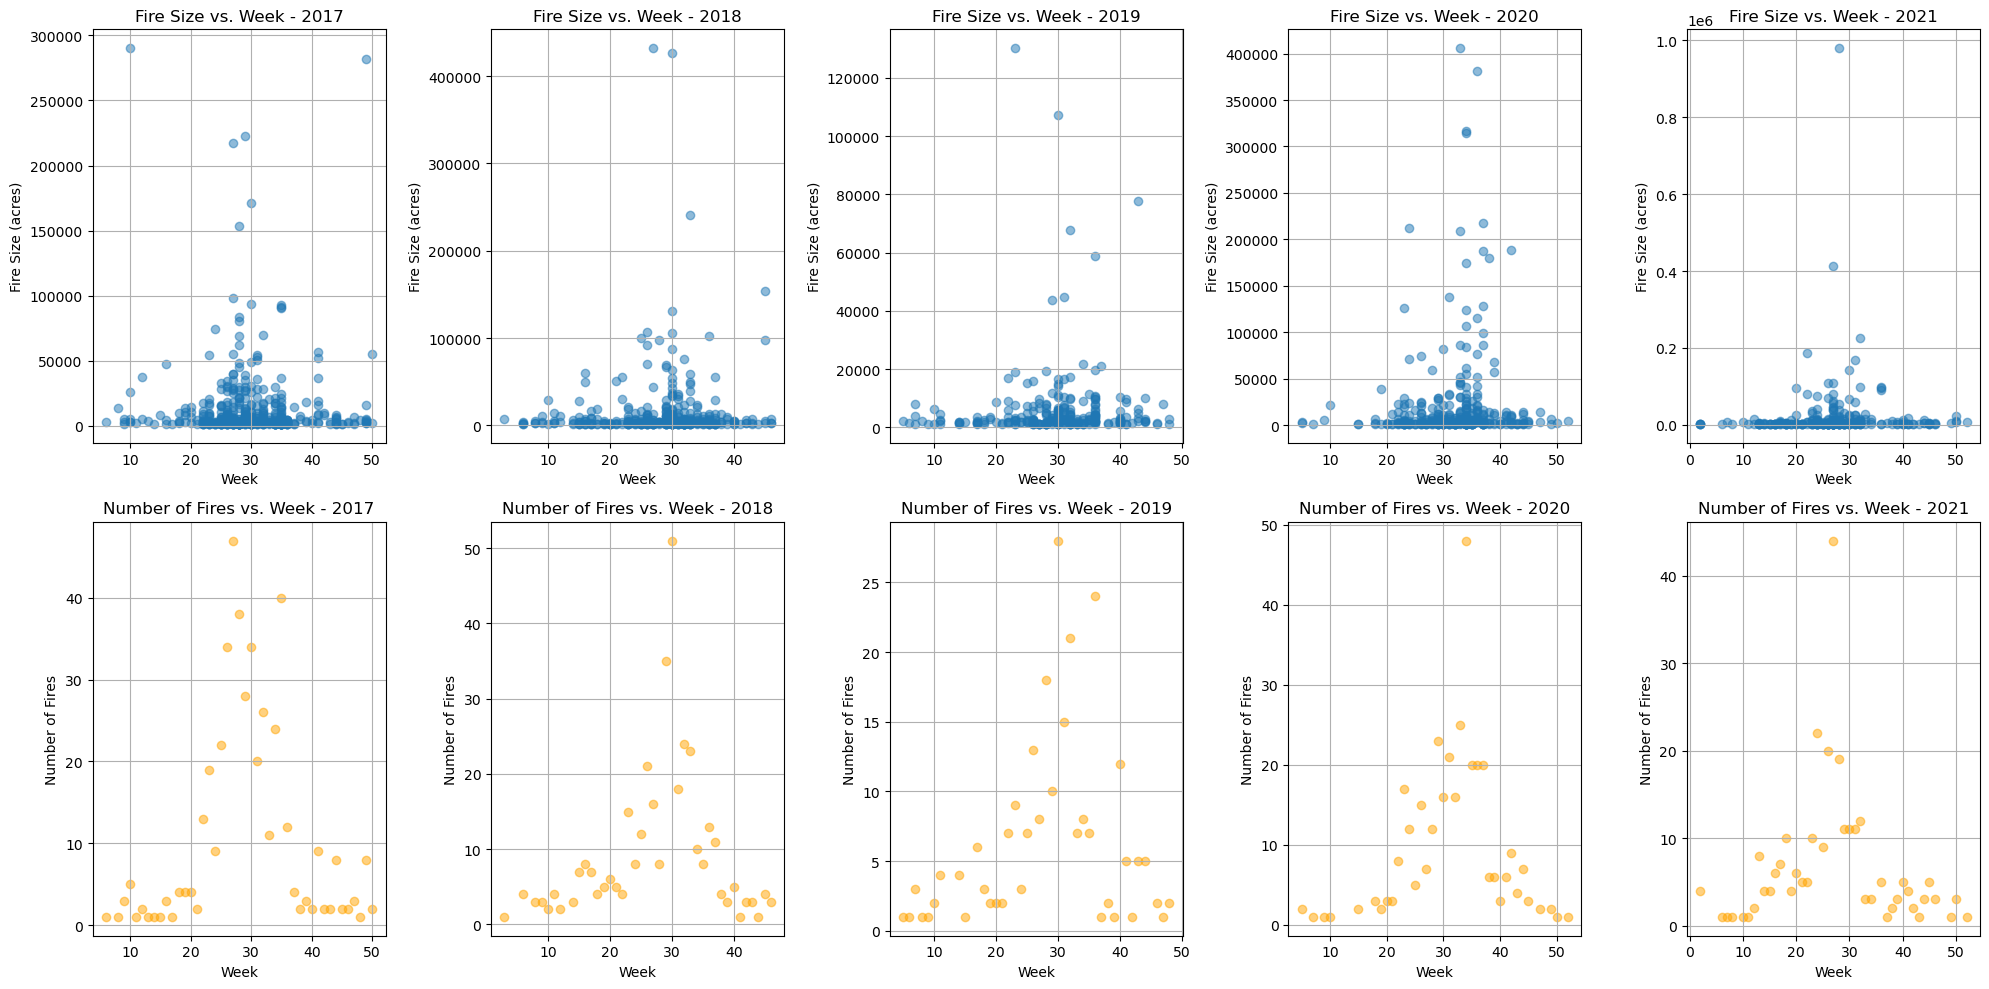

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load fire data from CSV
file_path = r"Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\mtbs_FODpoints.csv"
fire_data = pd.read_csv(file_path)

# Convert Ig_Date to datetime
fire_data['Ig_Date'] = pd.to_datetime(fire_data['Ig_Date'])

# Extract Year, Month, and WeekNum
fire_data['Year'] = fire_data['Ig_Date'].dt.year
fire_data['Month'] = fire_data['Ig_Date'].dt.month
fire_data['WeekNum'] = fire_data['Ig_Date'].dt.isocalendar().week

# Filter data for the years 2017 to 2021
fire_data = fire_data[(fire_data['Ig_Date'].dt.year >= 2017) & (fire_data['Ig_Date'].dt.year <= 2021)]

# Create a 2x10 subplot grid
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Plot scatter plots for each year
for i, year in enumerate(range(2017, 2022)):
    # Filter data for the current year
    data_year = fire_data[fire_data['Year'] == year]

    # Plot fire size vs. week scatter plot
    axs[0, i].scatter(data_year['WeekNum'], data_year['BurnBndAc'], alpha=0.5)
    axs[0, i].set_title(f'Fire Size vs. Week - {year}')
    axs[0, i].set_xlabel('Week')
    axs[0, i].set_ylabel('Fire Size (acres)')
    axs[0, i].grid(True)

    # Plot number of fires vs. week scatter plot
    fires_by_week = data_year.groupby('WeekNum').size()
    axs[1, i].scatter(fires_by_week.index, fires_by_week.values, alpha=0.5, color='orange')
    axs[1, i].set_title(f'Number of Fires vs. Week - {year}')
    axs[1, i].set_xlabel('Week')
    axs[1, i].set_ylabel('Number of Fires')
    axs[1, i].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


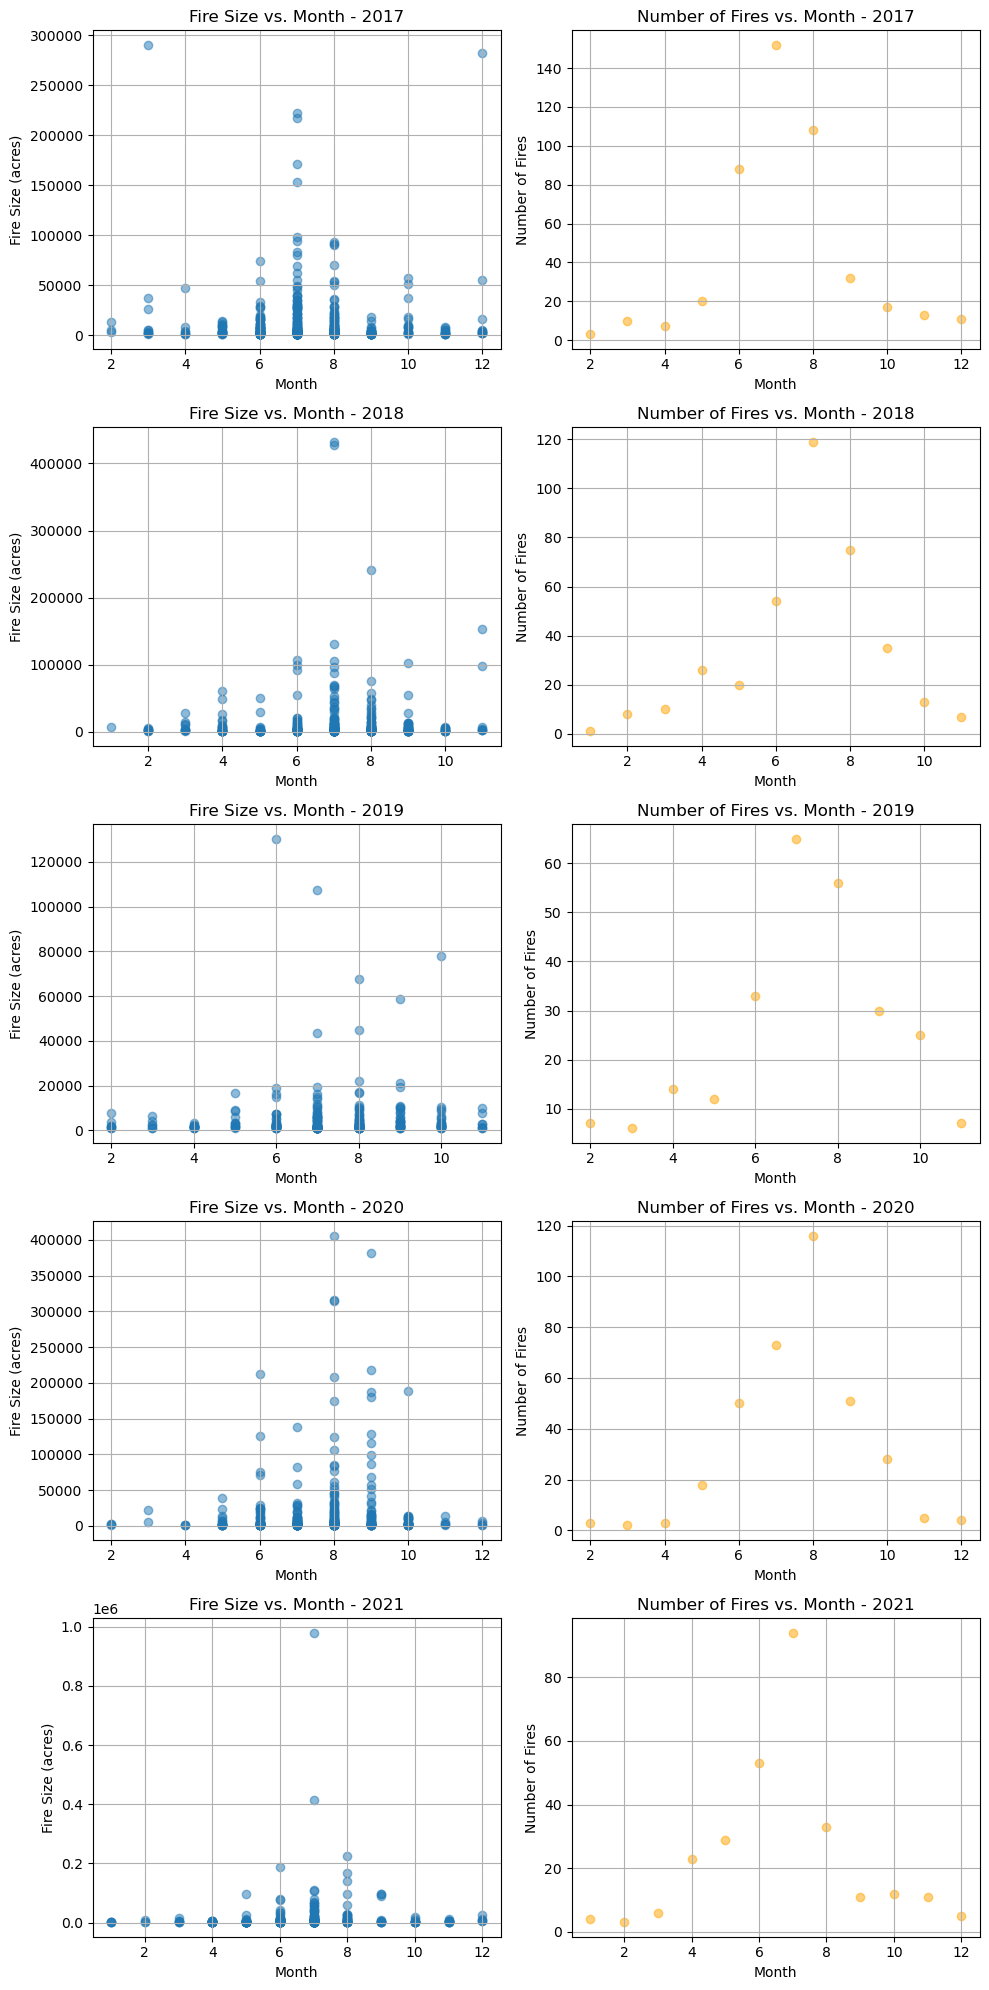

In [64]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load fire data from CSV
# file_path = r"Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\mtbs_FODpoints.csv"
# fire_data = pd.read_csv(file_path)

# # Convert Ig_Date to datetime
# fire_data['Ig_Date'] = pd.to_datetime(fire_data['Ig_Date'])

# # Extract Year, Month, and WeekNum
# fire_data['Year'] = fire_data['Ig_Date'].dt.year
# fire_data['Month'] = fire_data['Ig_Date'].dt.month
# fire_data['WeekNum'] = fire_data['Ig_Date'].dt.isocalendar().week

# # Filter data for the years 2017 to 2021
# fire_data = fire_data[(fire_data['Ig_Date'].dt.year >= 2017) & (fire_data['Ig_Date'].dt.year <= 2021)]

# # Create a 2x10 subplot grid
# fig, axs = plt.subplots(5, 2, figsize=(10, 20))

# # Plot scatter plots for each year
# for i, year in enumerate(range(2017, 2022)):
#     # Filter data for the current year
#     data_year = fire_data[fire_data['Year'] == year]

#     # Plot fire size vs. week scatter plot
#     axs[i, 0].scatter(data_year['Month'], data_year['BurnBndAc'], alpha=0.5)
#     axs[i, 0].set_title(f'Fire Size vs. Month - {year}')
#     axs[i, 0].set_xlabel('Month')
#     axs[i, 0].set_ylabel('Fire Size (acres)')
#     axs[i, 0].grid(True)

#     # Plot number of fires vs. week scatter plot
#     fires_by_week = data_year.groupby('Month').size()
#     axs[i, 1].scatter(fires_by_week.index, fires_by_week.values, alpha=0.5, color='orange')
#     axs[i, 1].set_title(f'Number of Fires vs. Month - {year}')
#     axs[i, 1].set_xlabel('Month')
#     axs[i, 1].set_ylabel('Number of Fires')
#     axs[i, 1].grid(True)

# # Adjust layout and show plot
# plt.tight_layout()
# plt.show()


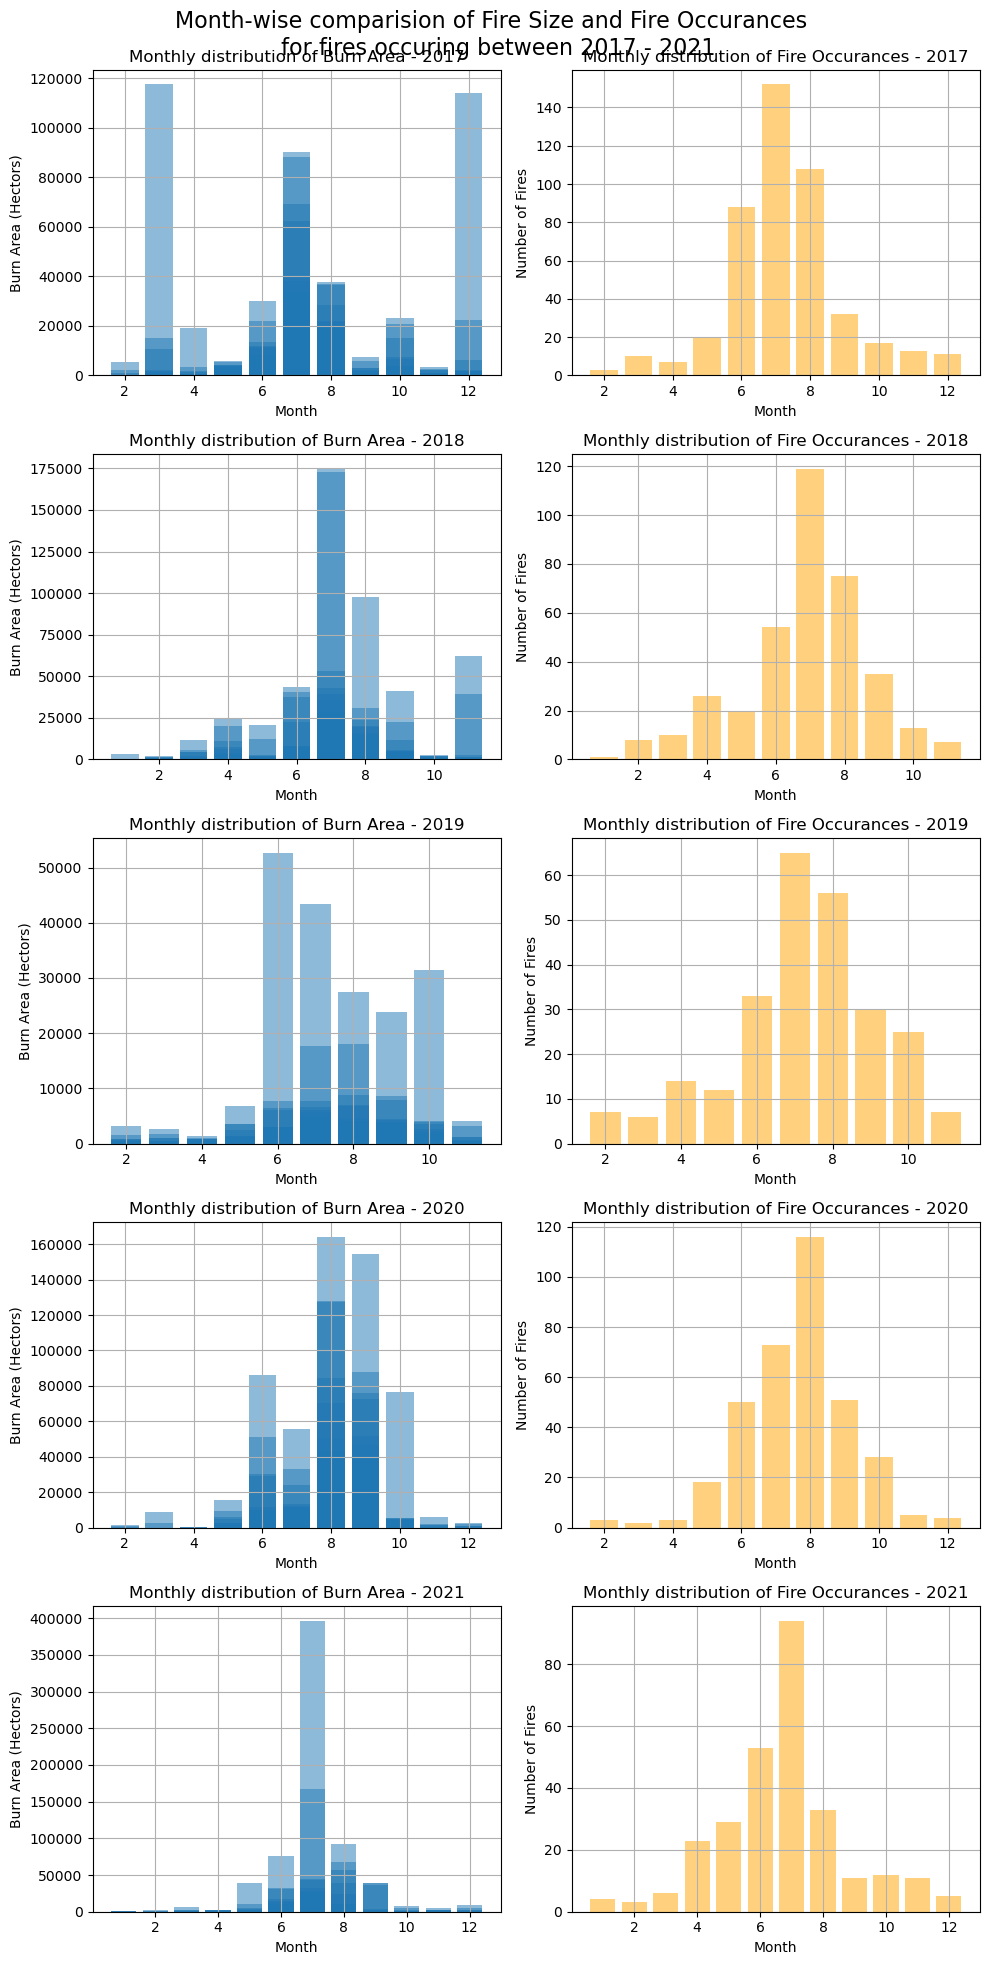

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load fire data from CSV
file_path = r"Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\mtbs_FODpoints.csv"
fire_data = pd.read_csv(file_path)

# Convert Ig_Date to datetime
fire_data['Ig_Date'] = pd.to_datetime(fire_data['Ig_Date'])

# Extract Year, Month, and WeekNum
fire_data['Year'] = fire_data['Ig_Date'].dt.year
fire_data['Month'] = fire_data['Ig_Date'].dt.month
fire_data['WeekNum'] = fire_data['Ig_Date'].dt.isocalendar().week

# Filter data for the years 2017 to 2021
fire_data = fire_data[(fire_data['Ig_Date'].dt.year >= 2017) & (fire_data['Ig_Date'].dt.year <= 2021)]

fire_data['BurnBndHect'] = fire_data['BurnBndAc'] * 0.404686

# Create a 2x10 subplot grid
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

# Add a title to the entire figure
# Add a title to the entire figure
fig.suptitle("Month-wise comparision of Fire Size and Fire Occurances \n for fires occuring between 2017 - 2021", fontsize=16)

# Plot bar plots for each year
for i, year in enumerate(range(2017, 2022)):
    # Filter data for the current year
    data_year = fire_data[fire_data['Year'] == year]

    # Plot fire size vs. month bar plot
    axs[i, 0].bar(data_year['Month'], data_year['BurnBndHect'], alpha=0.5)
    axs[i, 0].set_title(f'Monthly distribution of Burn Area - {year}')
    axs[i, 0].set_xlabel('Month')
    axs[i, 0].set_ylabel('Burn Area (Hectors)')
    axs[i, 0].grid(True)

    # Plot number of fires vs. month bar plot
    fires_by_month = data_year.groupby('Month').size()
    axs[i, 1].bar(fires_by_month.index, fires_by_month.values, alpha=0.5, color='orange')
    axs[i, 1].set_title(f'Monthly distribution of Fire Occurances - {year}')
    axs[i, 1].set_xlabel('Month')
    axs[i, 1].set_ylabel('Number of Fires')
    axs[i, 1].grid(True)

# Adjust layout and show plot
output_folder = r'Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\plots'
os.makedirs(output_folder, exist_ok=True)

# Define burnarea
burnarea = 'BurnArea_vs_FireOccurances_2017_21'  # replace with your desired file name

file_name = f'{burnarea}.png'

file_path = os.path.join(output_folder, file_name)
plt.savefig(file_path)

plt.tight_layout()
plt.show()
plt.close()


# By Ecoregion

## Total number of fires

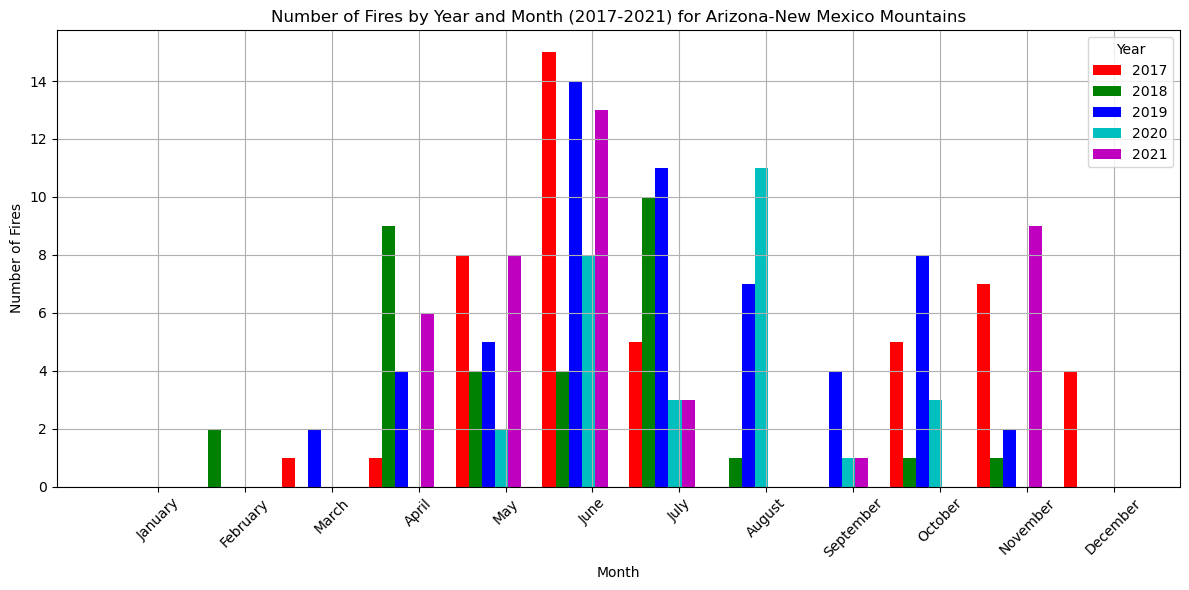

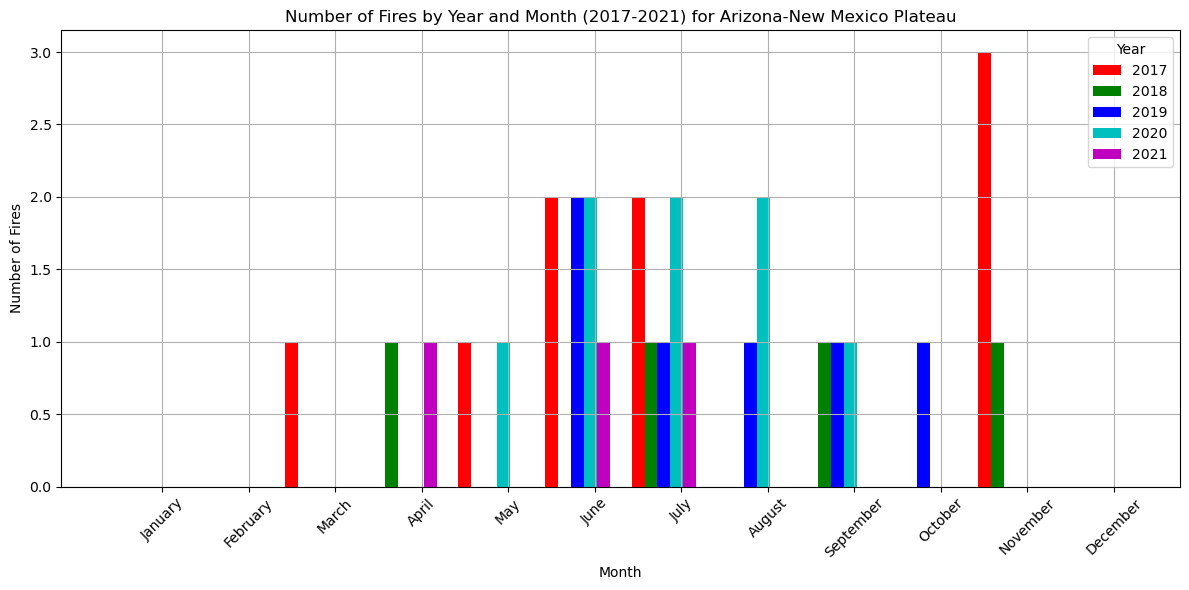

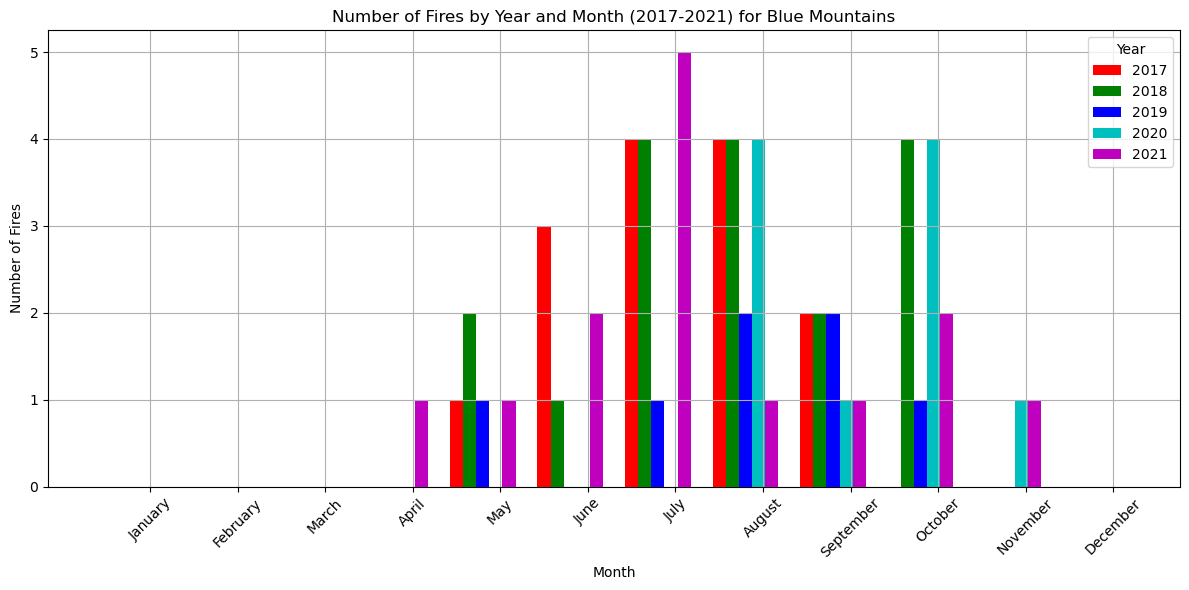

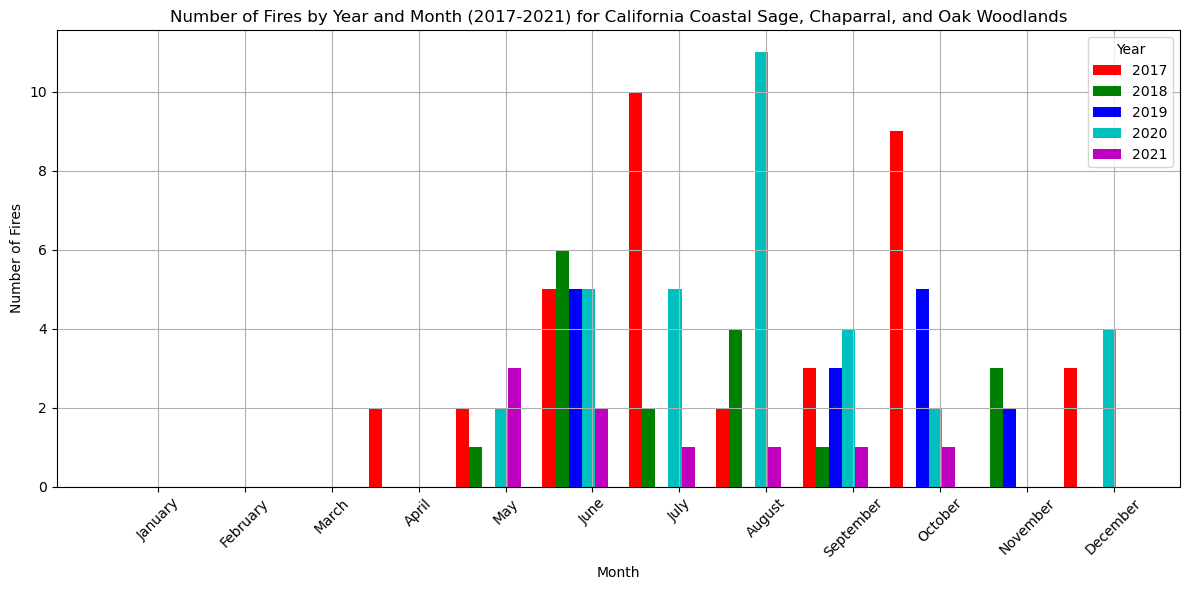

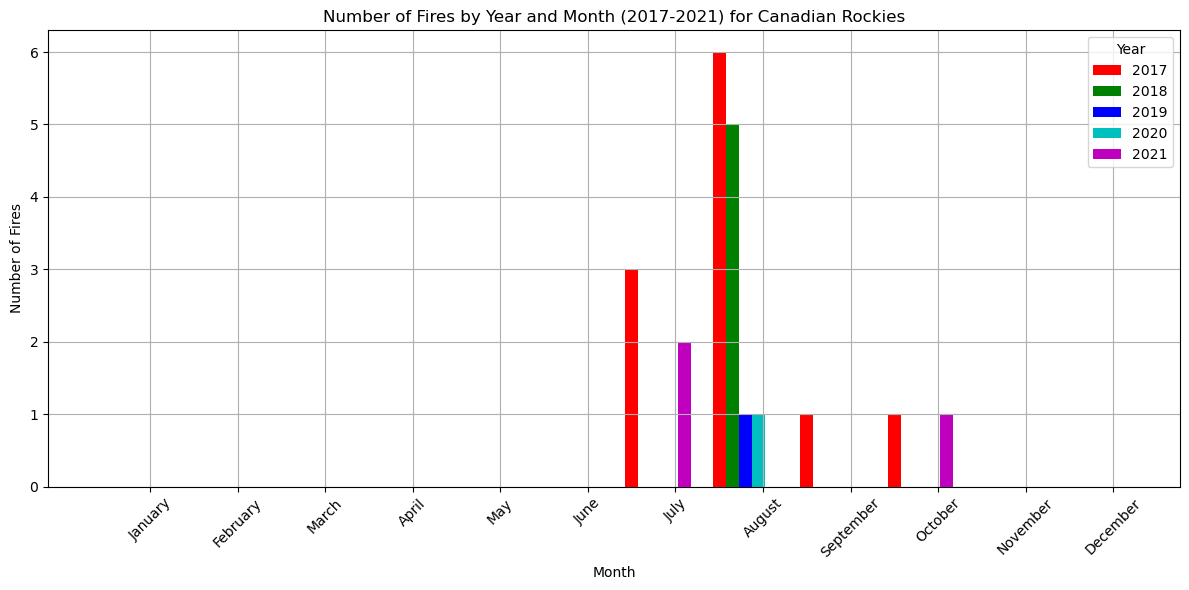

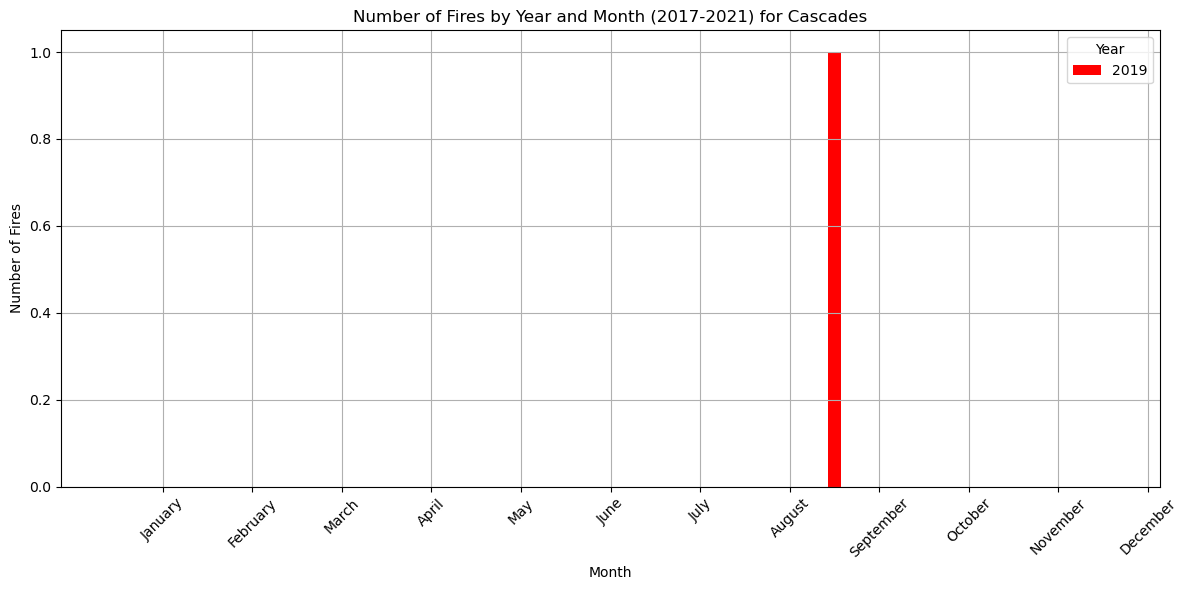

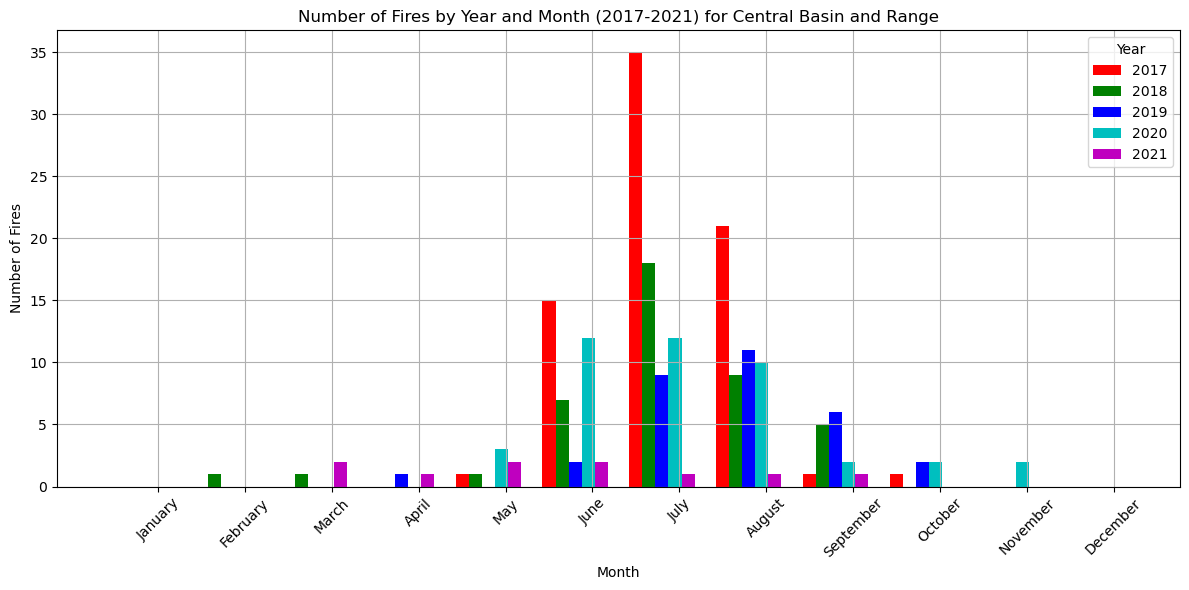

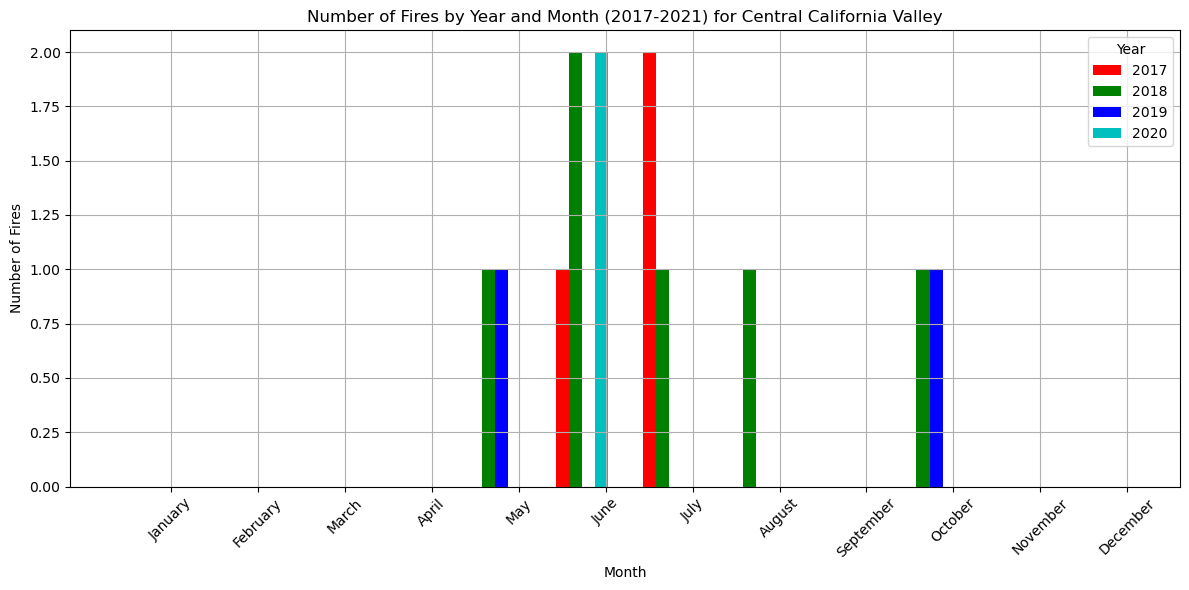

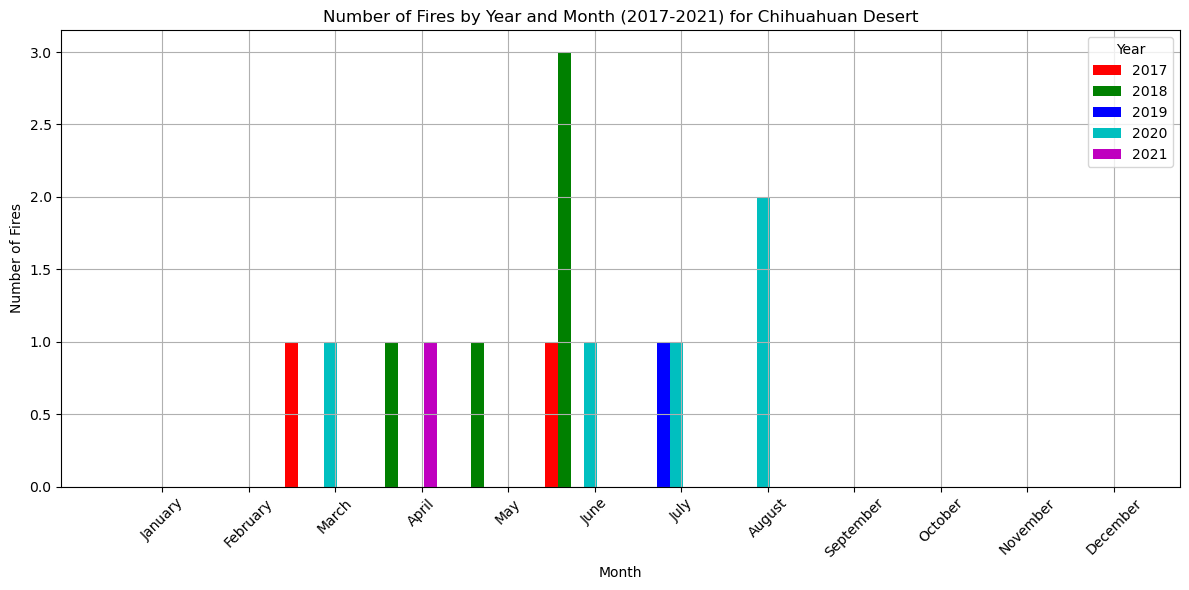

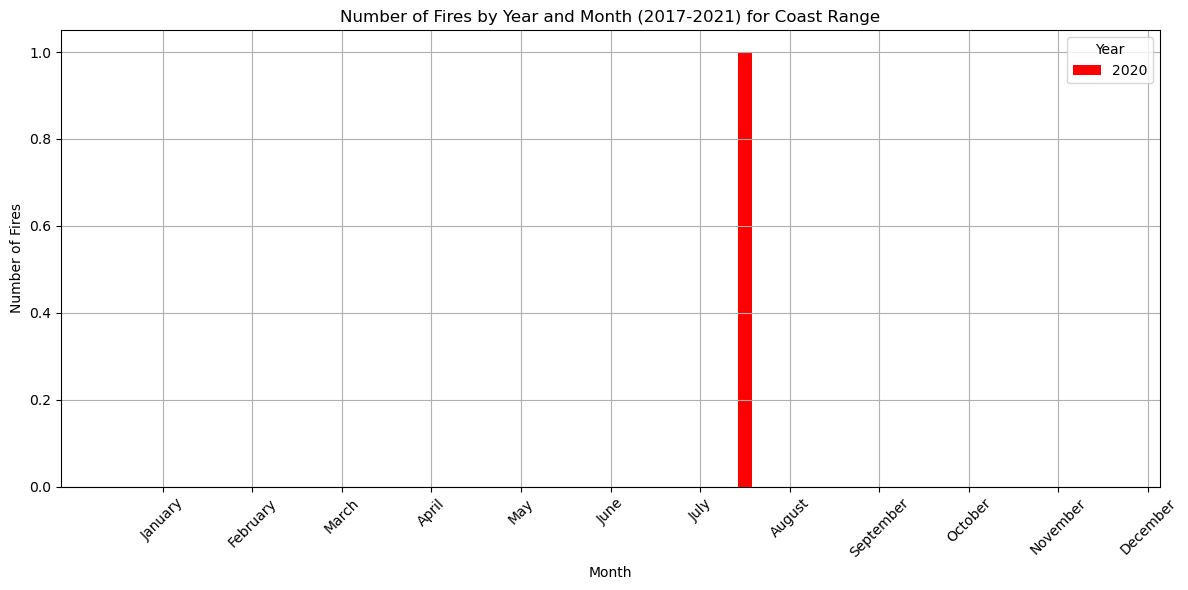

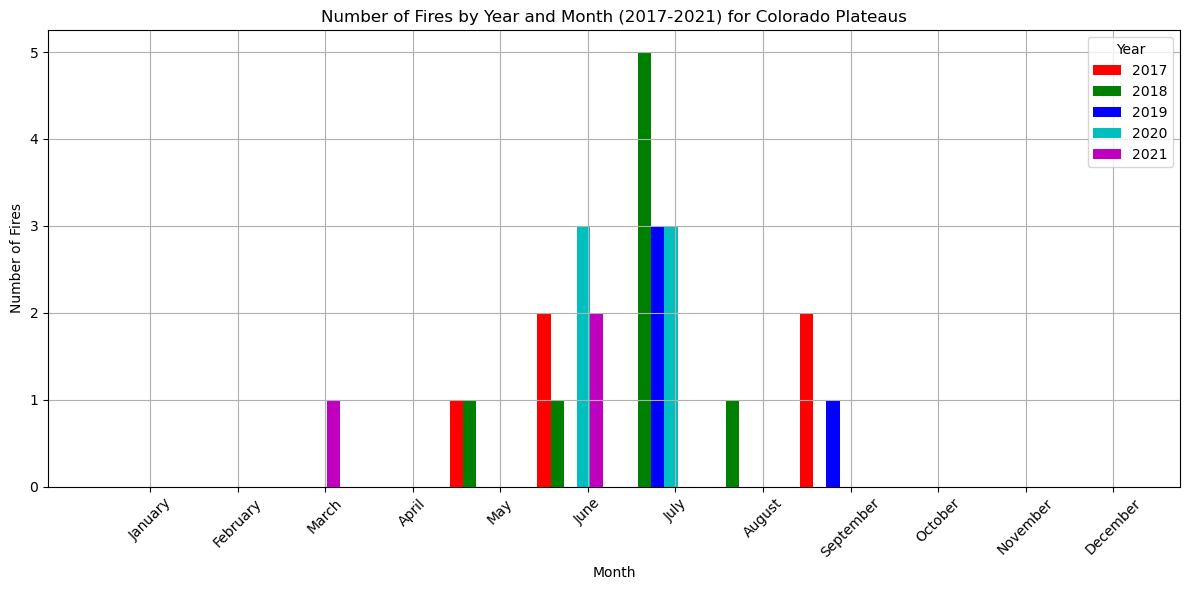

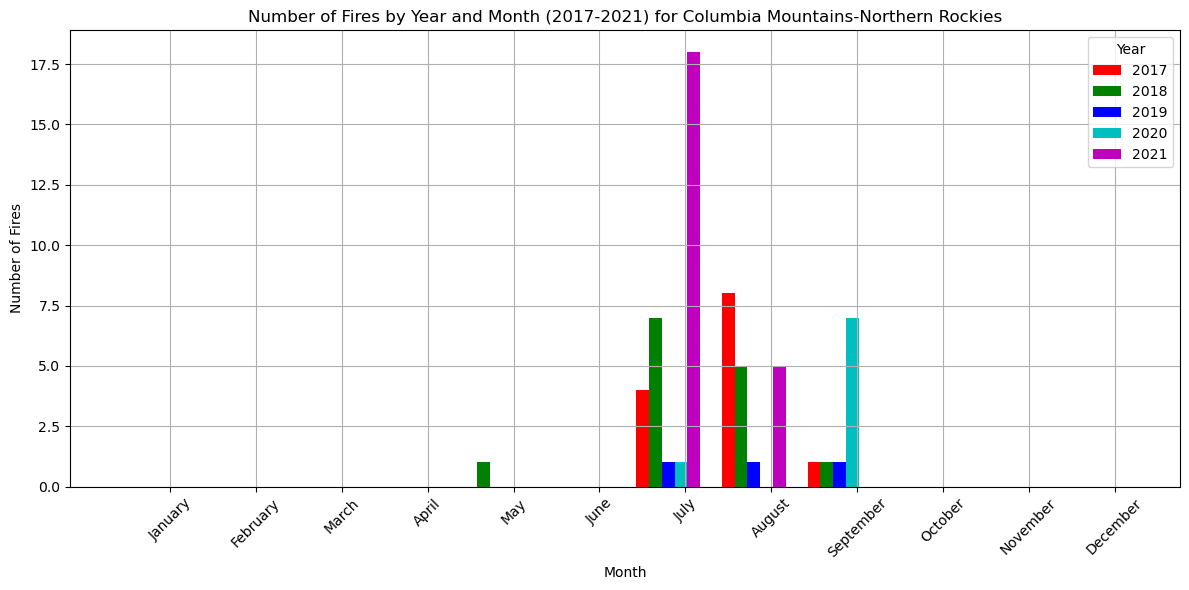

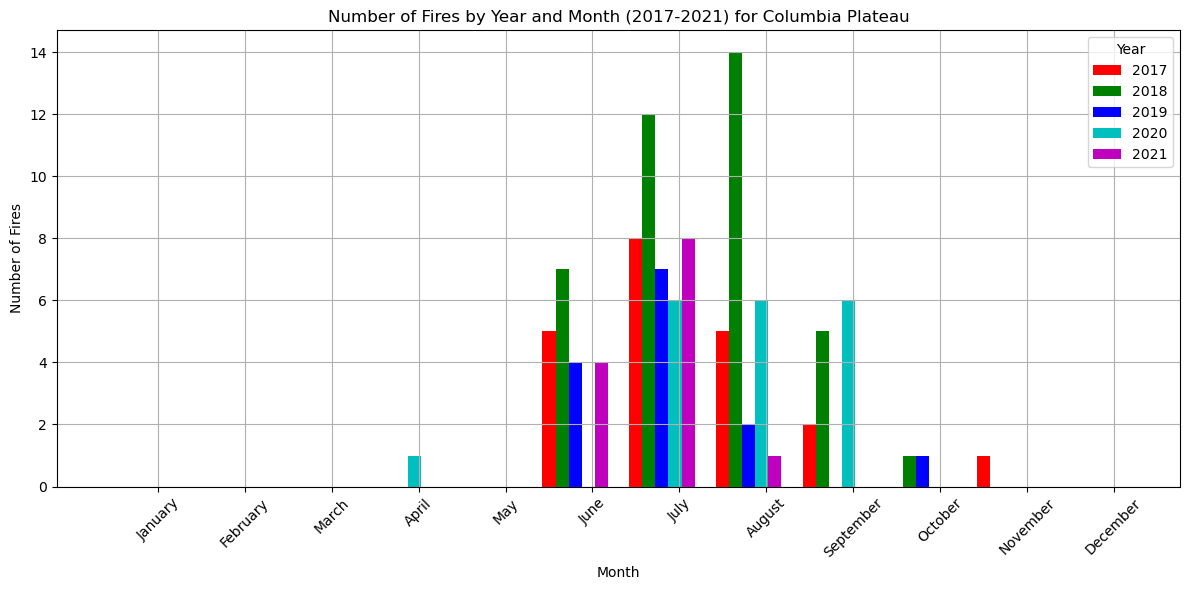

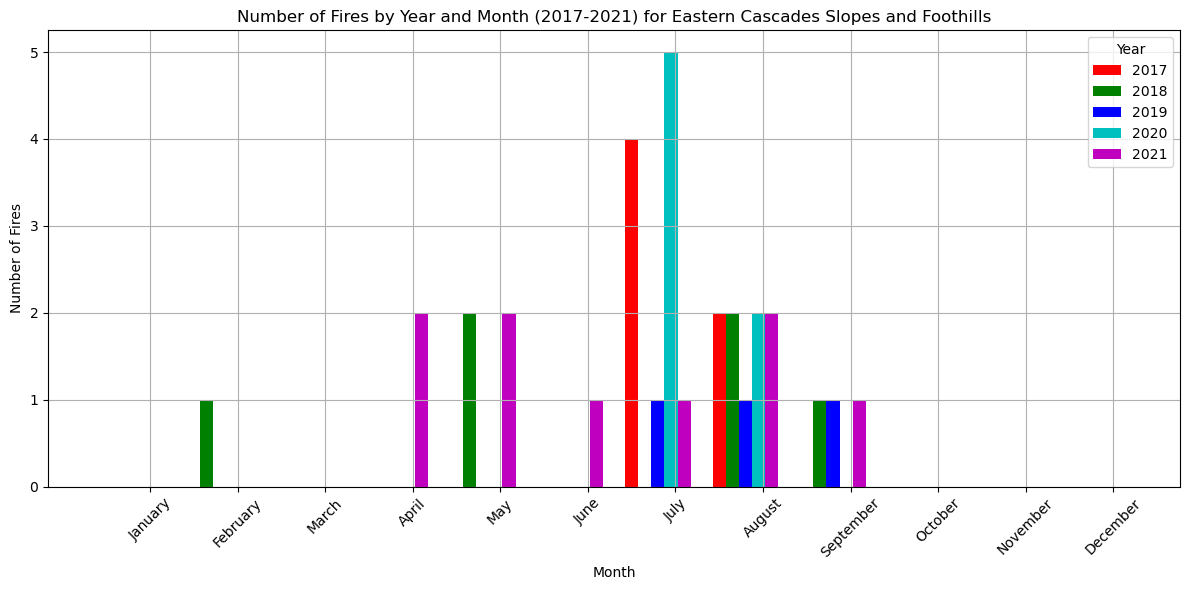

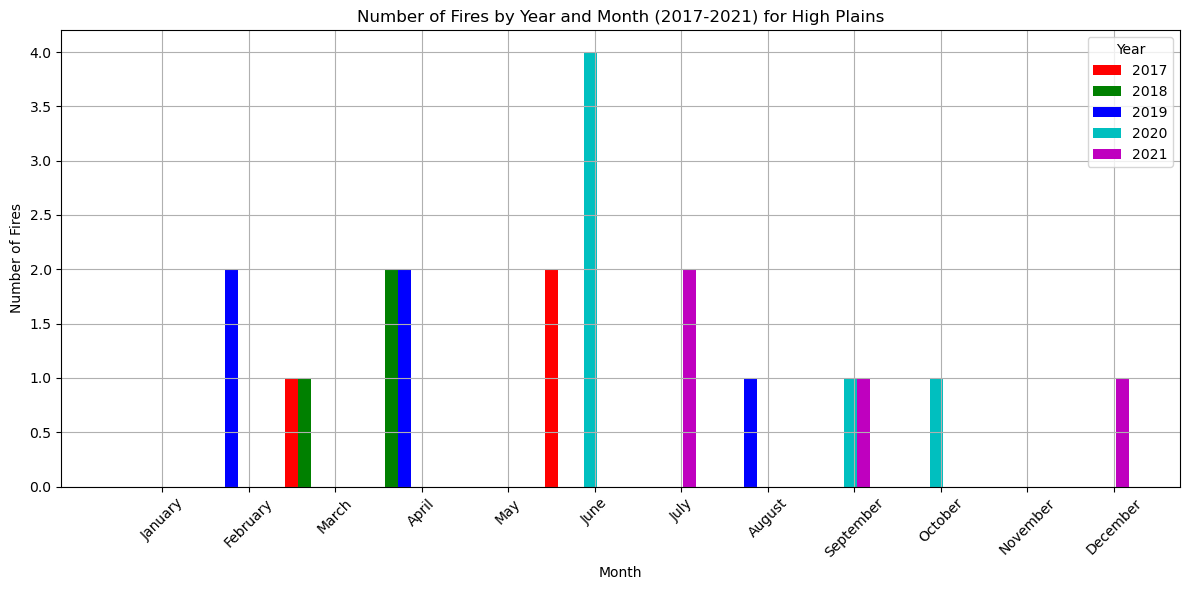

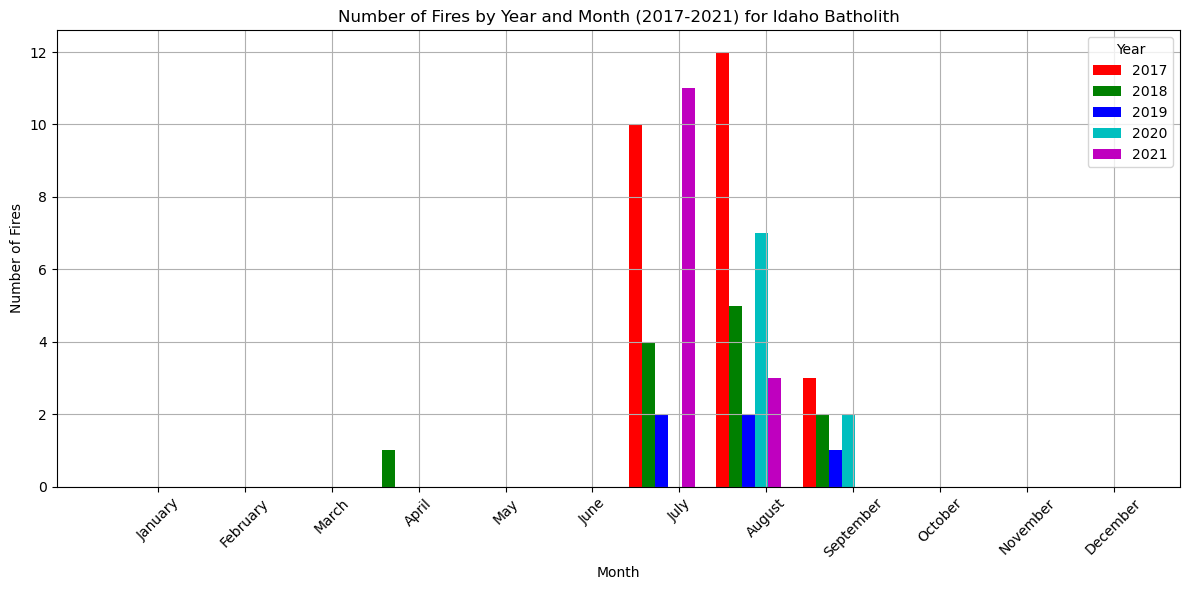

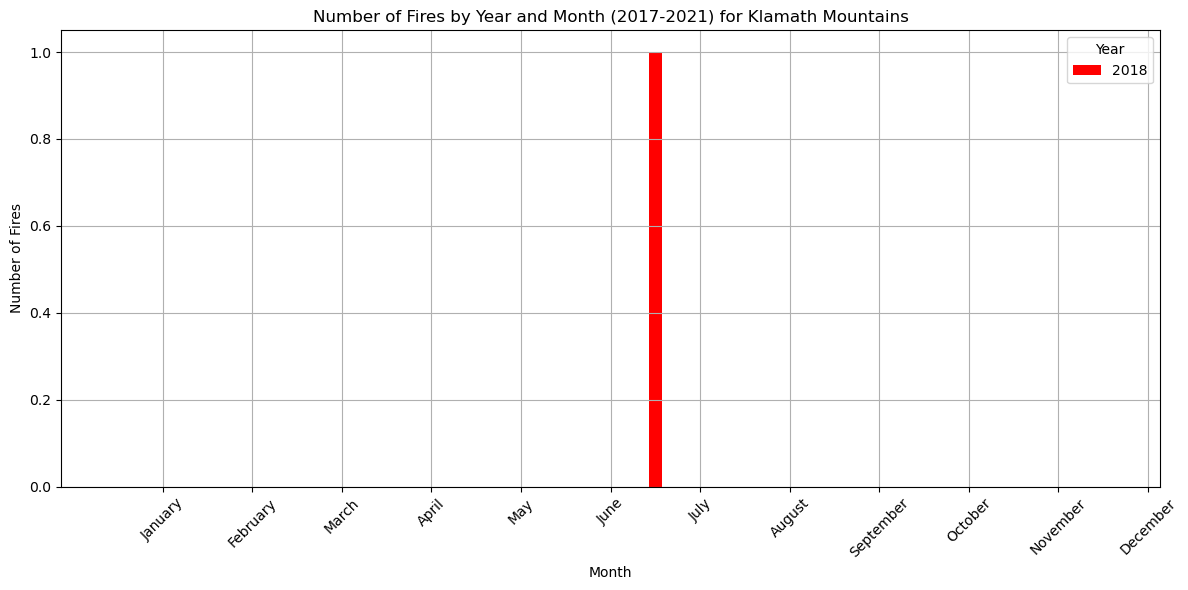

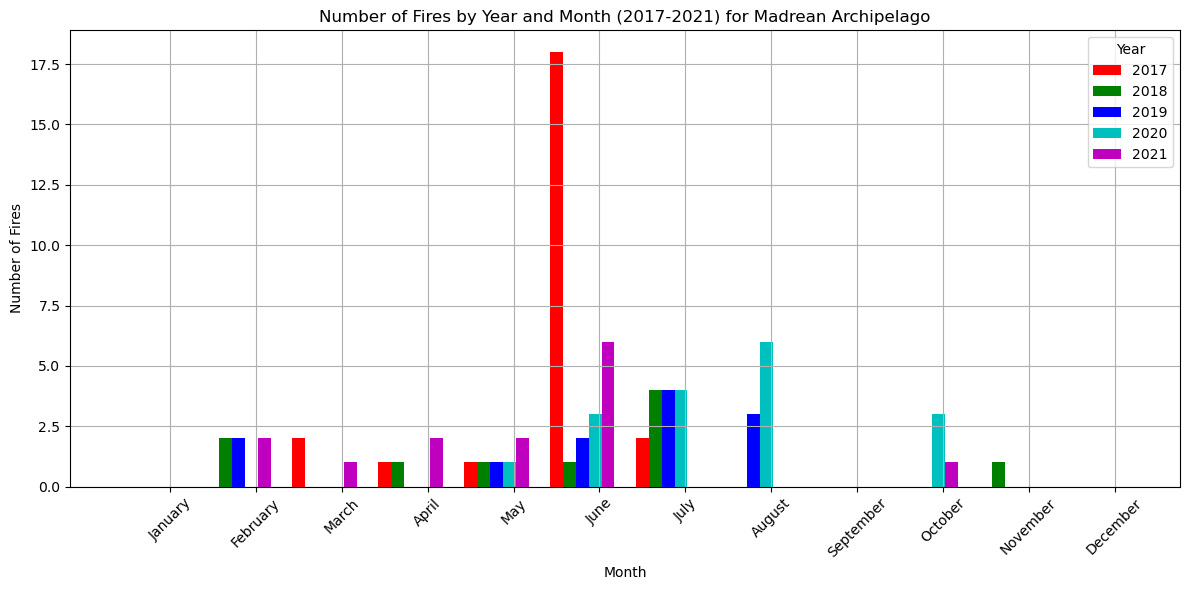

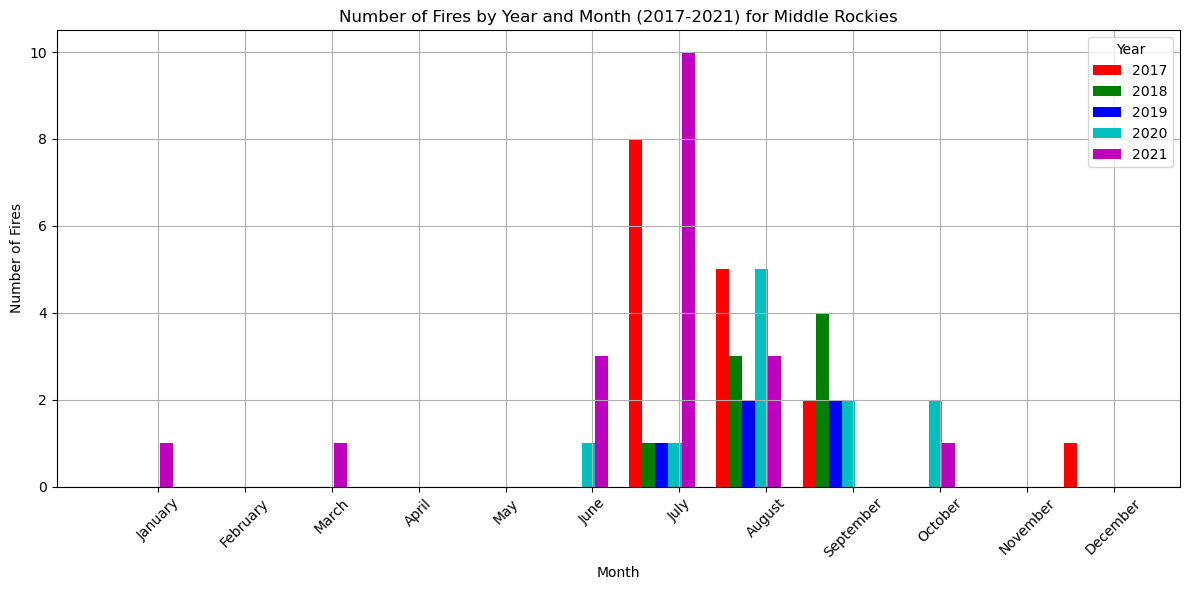

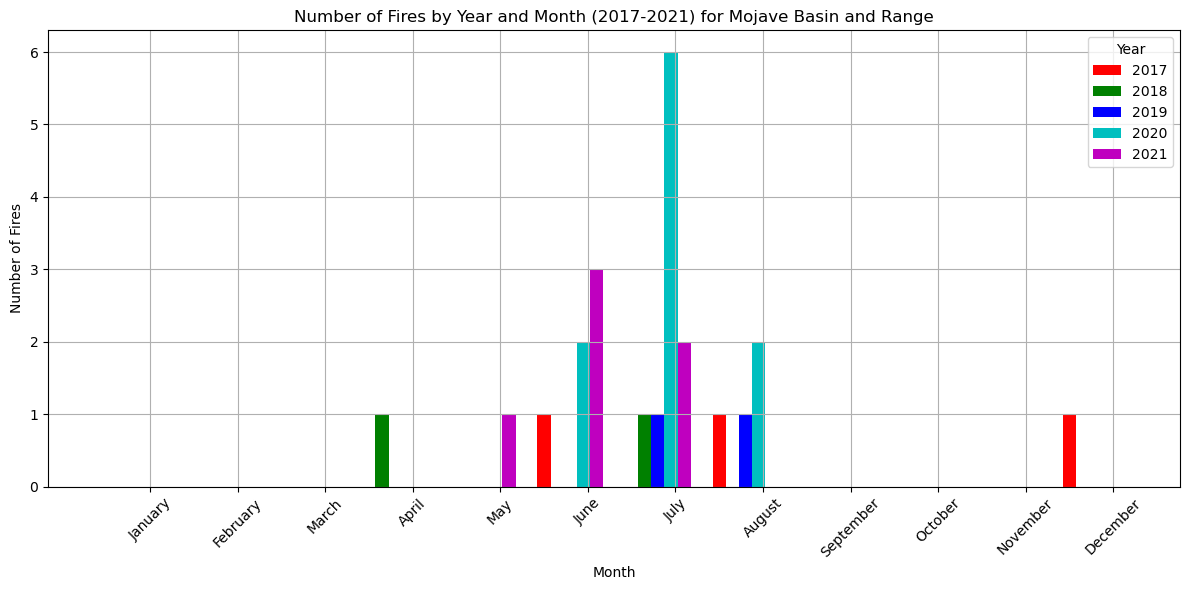

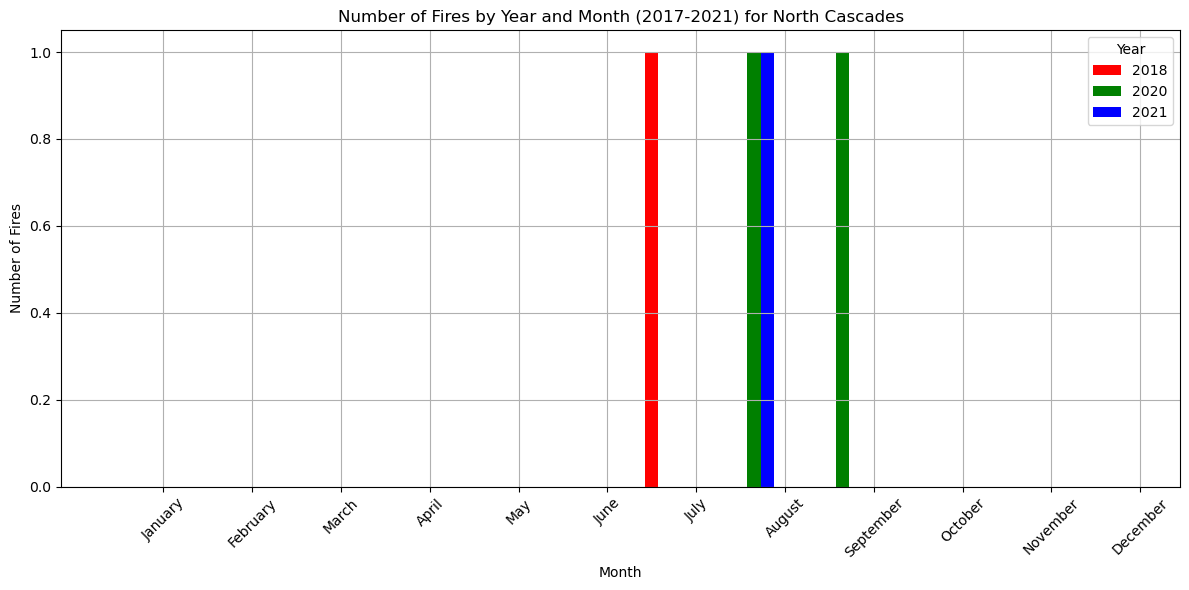

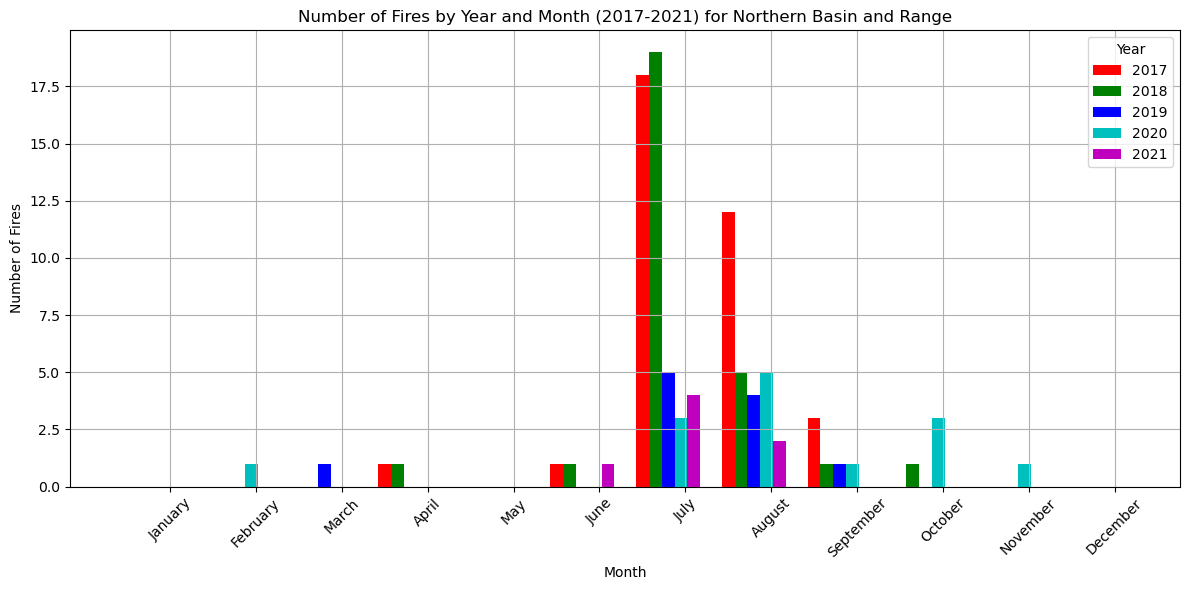

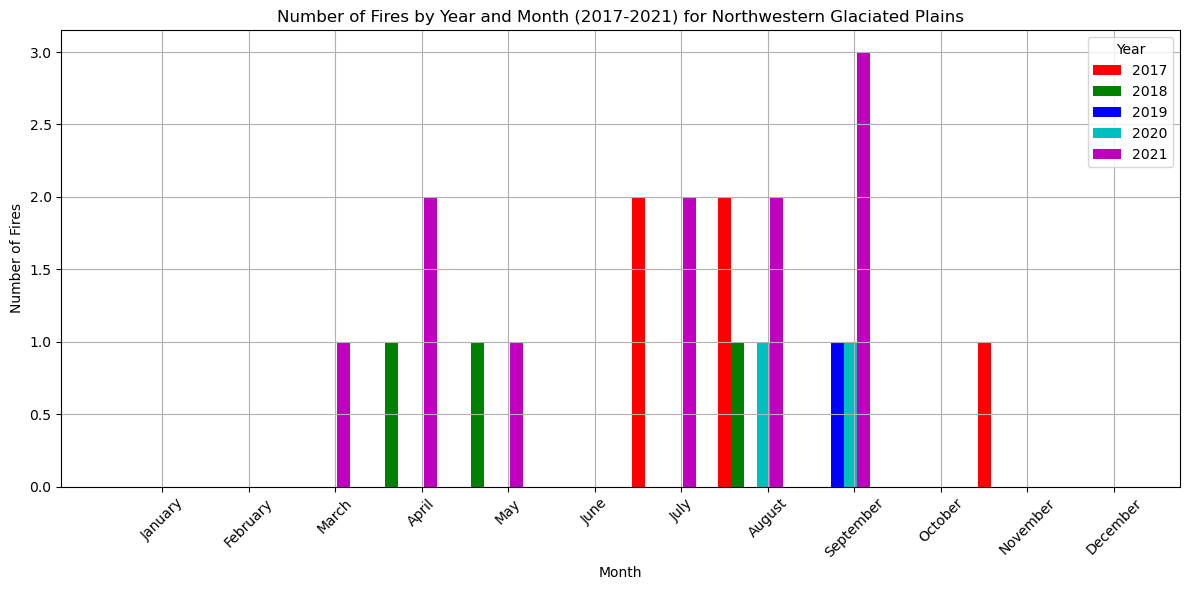

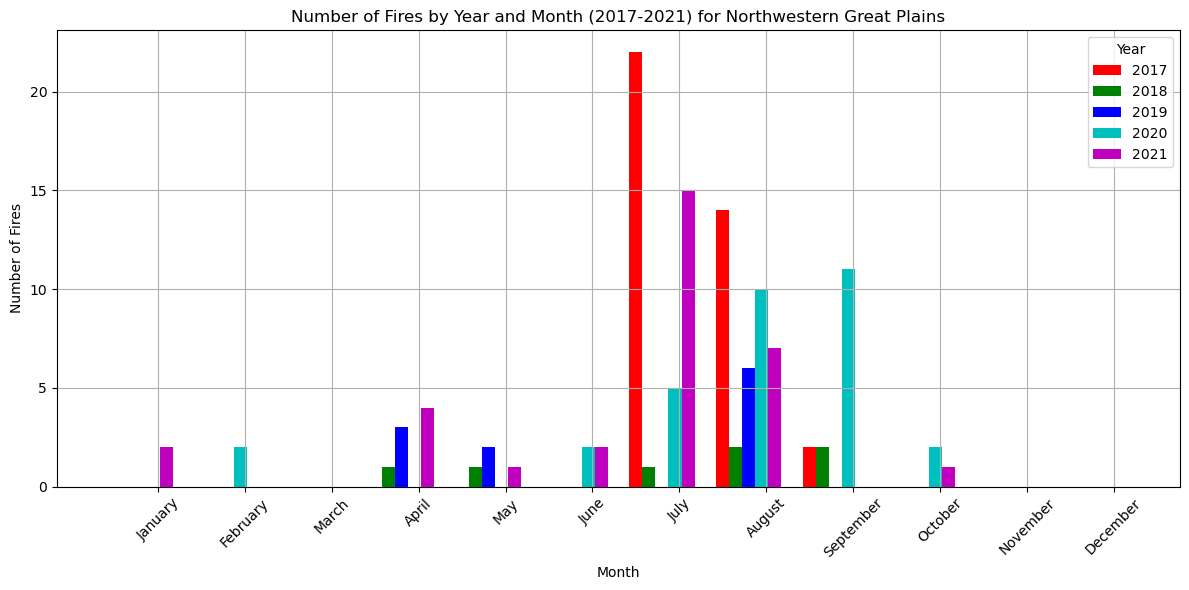

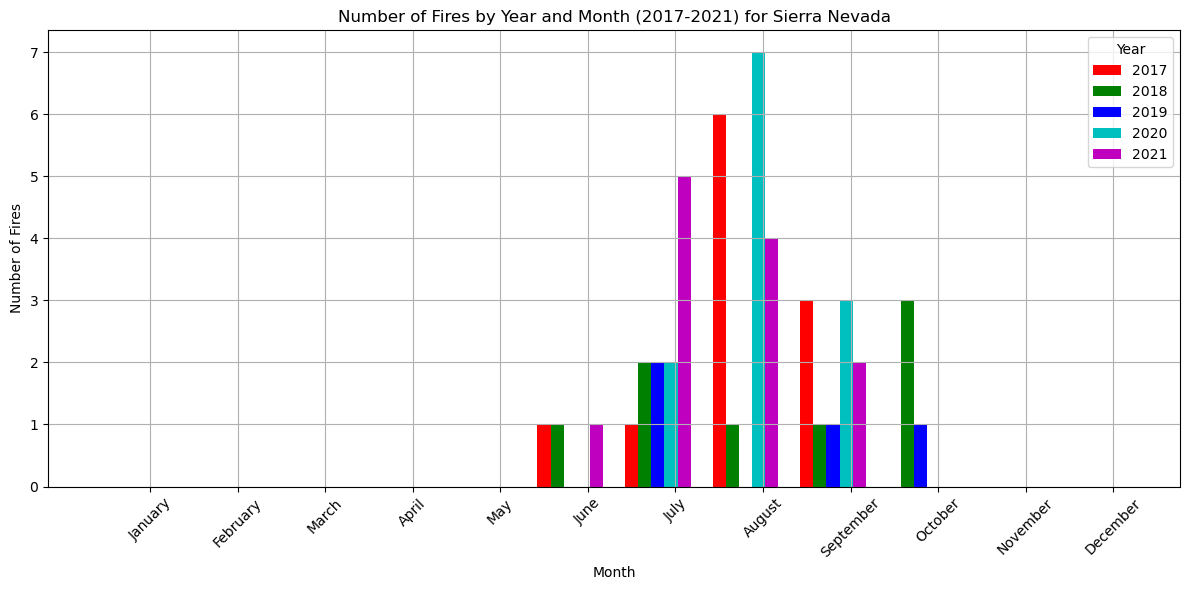

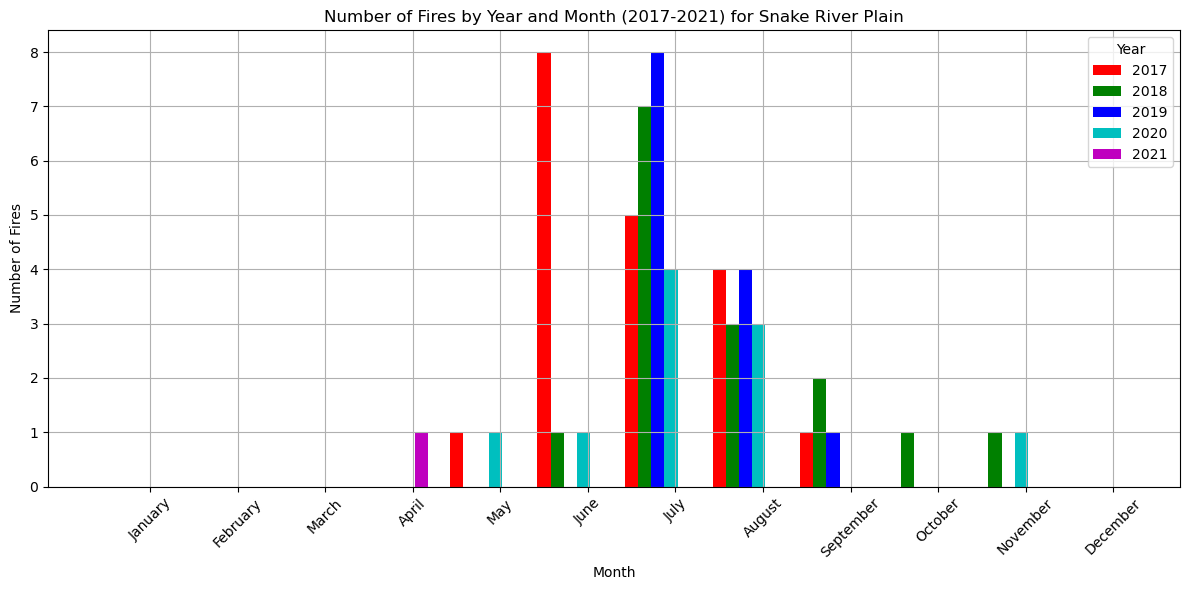

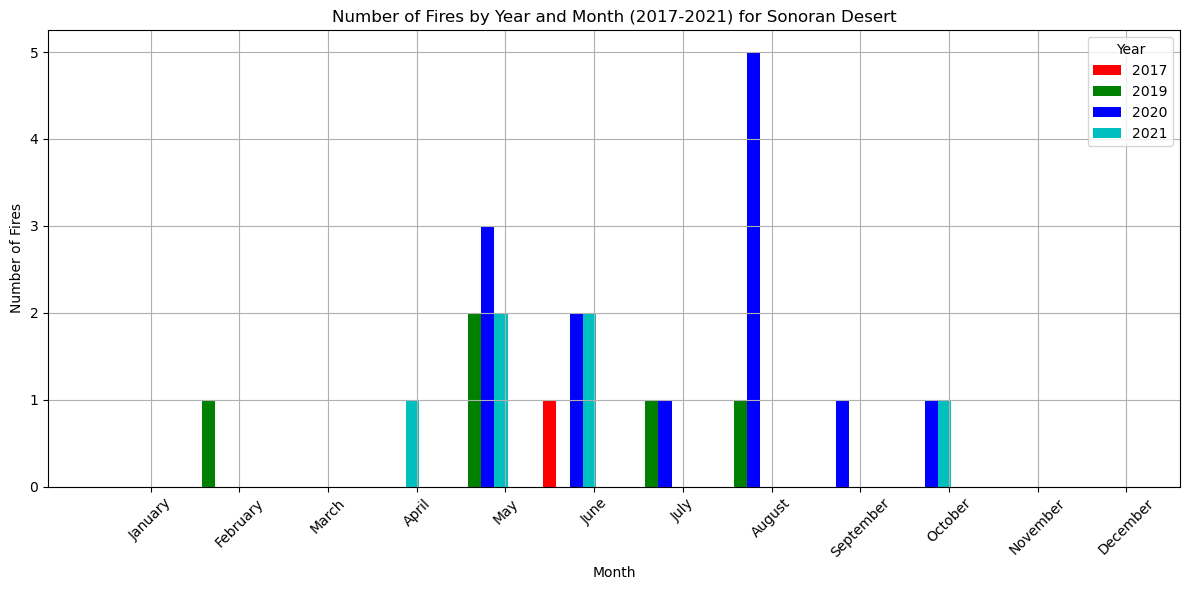

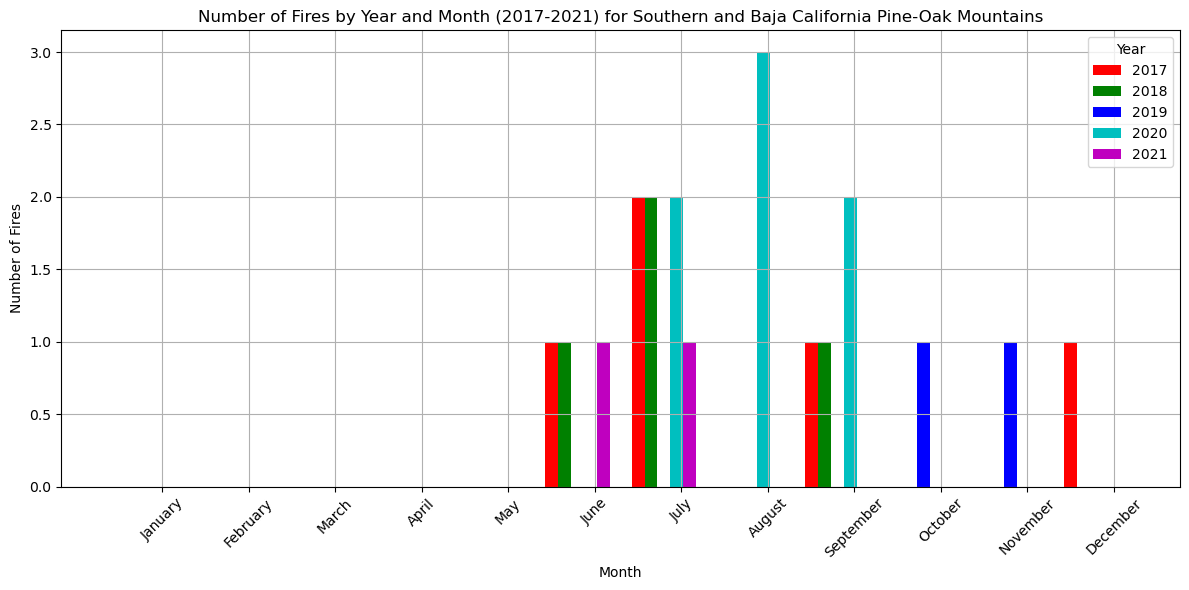

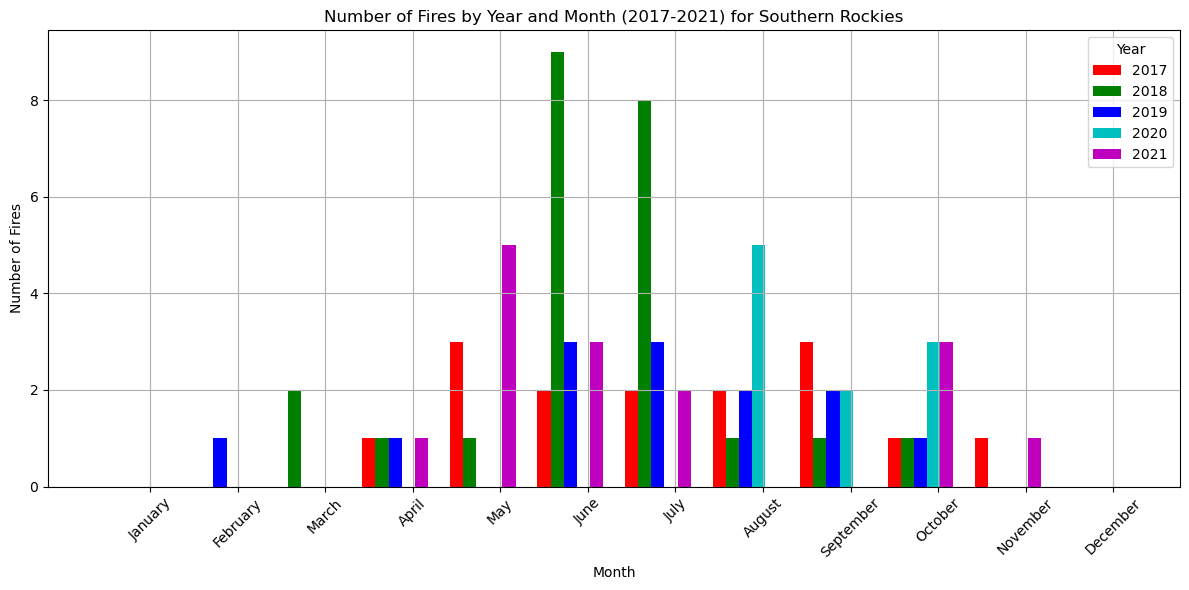

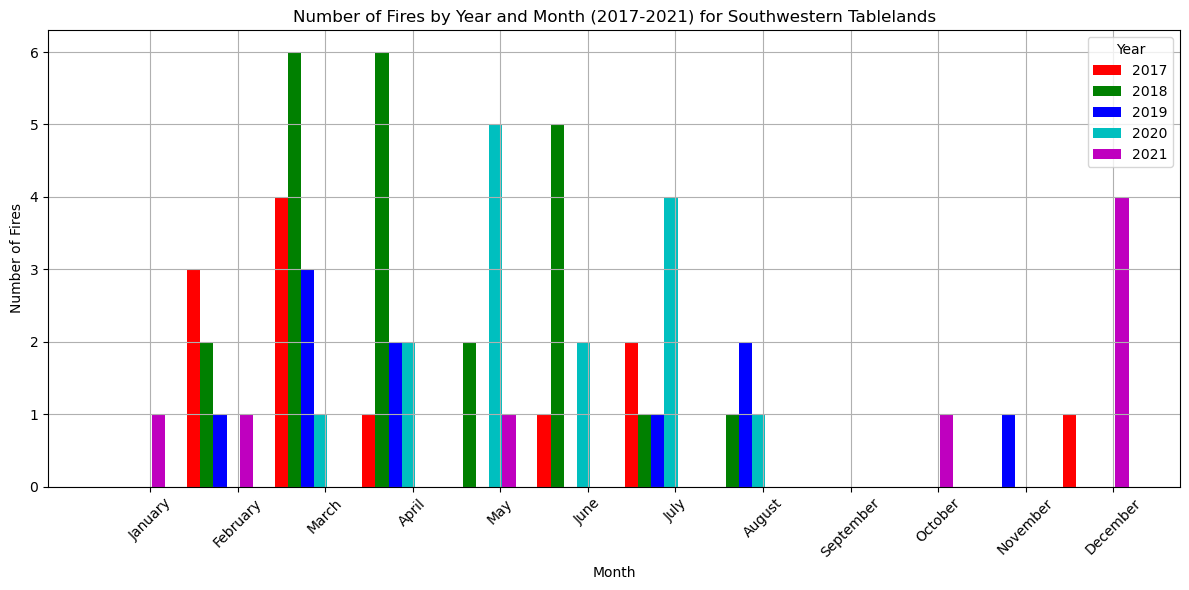

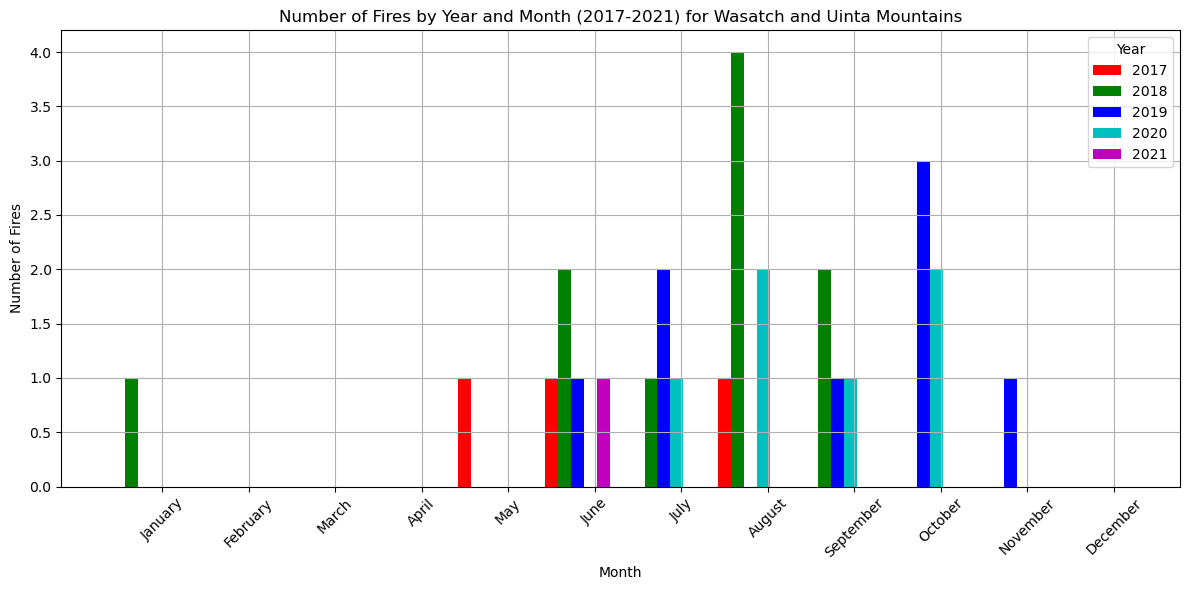

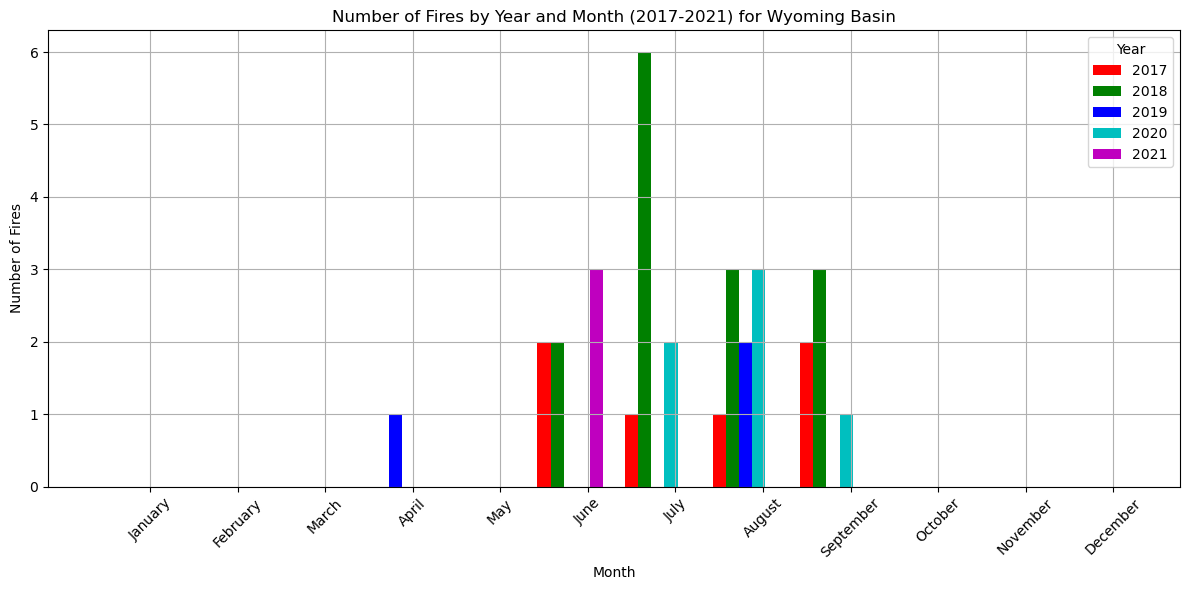

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load fire data from CSV
file_path = r"Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\mtbs_eco_2017_2021.csv"
fire_data = pd.read_csv(file_path)

# Convert Ig_Date to datetime
fire_data['Ig_Date'] = pd.to_datetime(fire_data['Ig_Date'])

# Extract Year and Month
fire_data['Year'] = fire_data['Ig_Date'].dt.year
fire_data['Month'] = fire_data['Ig_Date'].dt.month
fire_data['WeekNum'] = fire_data['Ig_Date'].dt.isocalendar().week

fire_data['Ecoregion'] = fire_data['NA_L3NAME']

# Filter fire data for years 2017 to 2021
filtered_fire_data = fire_data[(fire_data['Year'] >= 2017) & (fire_data['Year'] <= 2021)]

# Group data by Ecoregion, Year, and Month and calculate count of fires for each combination
grouped_data = filtered_fire_data.groupby(['Ecoregion', 'Year', 'Month']).size().unstack(fill_value=0)

# Get the unique Ecoregions
ecoregions = filtered_fire_data['Ecoregion'].unique()

# Adjust layout and show plot
output_folder = r'Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\plots\ecoregion\FireOccurances'
os.makedirs(output_folder, exist_ok=True)

# Create a clustered column chart for each Ecoregion
for ecoregion in ecoregions:
    plt.figure(figsize=(12, 6))
    ecoregion_data = grouped_data.loc[ecoregion]
    
    for i, year in enumerate(ecoregion_data.index):
        plt.bar(index + i * bar_width, ecoregion_data.loc[year], bar_width, label=str(year), color=colors[i])
    
    plt.title(f'Number of Fires by Year and Month (2017-2021) for {ecoregion}')
    plt.xlabel('Month')
    plt.ylabel('Number of Fires')
    plt.xticks(index + 0.5, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
    plt.legend(title='Year')
    plt.grid()
    
    # Adjust layout and show plot
    fireoccurances = f'Total_FireOccurances_byExoregion_{ecoregion}_byYearandMonth_2017_21'  # replace with your desired file name
    file_name = f'{fireoccurances}.png'
    file_path = os.path.join(output_folder, file_name)
    plt.savefig(file_path)
    plt.tight_layout()
    plt.show()
    plt.close()


## By burn area

In [31]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import os

# # Load fire data from CSV
# file_path = r"Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\mtbs_eco_2017_2021.csv"
# fire_data = pd.read_csv(file_path)

# # Convert Ig_Date to datetime
# fire_data['Ig_Date'] = pd.to_datetime(fire_data['Ig_Date'])

# # Extract Year and Month
# fire_data['Year'] = fire_data['Ig_Date'].dt.year
# fire_data['Month'] = fire_data['Ig_Date'].dt.month
# fire_data['WeekNum'] = fire_data['Ig_Date'].dt.isocalendar().week

# fire_data['Ecoregion'] = fire_data['NA_L3NAME']
# fire_data['BurnBndHect'] = fire_data['BurnBndAc'] * 0.404686

# # Filter fire data for years 2017 to 2021
# filtered_fire_data = fire_data[(fire_data['Year'] >= 2017) & (fire_data['Year'] <= 2021)]

# # Group data by Ecoregion, Year, and Month and calculate total burn area for each combination
# grouped_data = filtered_fire_data.groupby(['Ecoregion', 'Year', 'Month'])['BurnBndHect'].sum().unstack(fill_value=0)

# # Get the unique Ecoregions
# ecoregions = fire_data['Ecoregion'].unique()

# #######################

# # Create a clustered bar chart for each Ecoregion
# for ecoregion in ecoregions:
#     plt.figure(figsize=(12, 6))
#     ecoregion_data = grouped_data.loc[ecoregion]
    
#     # Bar positions and width
#     index = np.arange(len(ecoregion_data.index))
#     bar_width = 0.2
    
#     # Get the burn area values for each month
#     burn_area_values = ecoregion_data.values
    
#     # Plot bars for each year
#     for i, year in enumerate(ecoregion_data.index):
#         plt.bar(index + i * bar_width, burn_area_values[:, i], bar_width, label=str(year))
    
#     plt.title(f'Burn Area by Year and Month (2017-2021) for {ecoregion}')
#     plt.xlabel('Month')
#     plt.ylabel('Burn Area (hectares)')
#     plt.xticks(index + bar_width * len(ecoregions) / 2, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
# #plt.xticks(index + 0.5, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
#     plt.legend(title='Year')
#     plt.grid()
    
#     # Save plot
#     output_folder = r'Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\plots\ecoregion\BurnArea'
#     os.makedirs(output_folder, exist_ok=True)
#     file_name = f'Total_BurnArea_byEcoregion_{ecoregion}_byYearandMonth_2017_21.png'
#     file_path = os.path.join(output_folder, file_name)
#     plt.savefig(file_path)
#     plt.tight_layout()
#     plt.show()
#     plt.close()


ValueError: shape mismatch: objects cannot be broadcast to a single shape

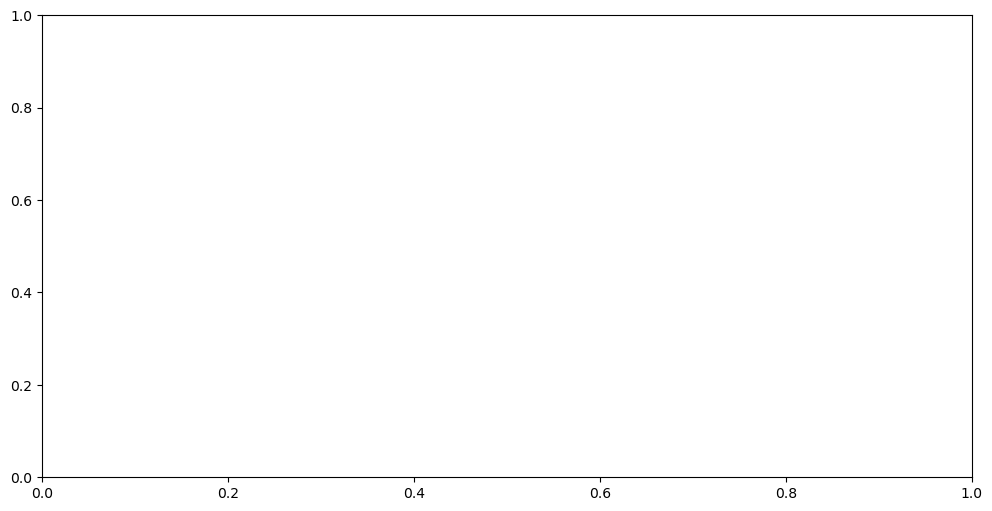

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load fire data from CSV
file_path = r"Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\mtbs_eco_2017_2021.csv"
fire_data = pd.read_csv(file_path)

# Convert Ig_Date to datetime
fire_data['Ig_Date'] = pd.to_datetime(fire_data['Ig_Date'])

# Extract Year, Month, and WeekNum
fire_data['Year'] = fire_data['Ig_Date'].dt.year
fire_data['Month'] = fire_data['Ig_Date'].dt.month
fire_data['WeekNum'] = fire_data['Ig_Date'].dt.isocalendar().week

# Convert BurnBndAc from acres to hectares
fire_data['BurnBndHect'] = fire_data['BurnBndAc'] * 0.404686

# Read Ecoregion
fire_data['Ecoregion'] = fire_data['NA_L3NAME']

# Group data by Ecoregion, Year, and Month and calculate total burn area for each combination
grouped_data = fire_data.groupby(['Ecoregion', 'Year', 'Month'])['BurnBndHect'].sum().unstack(fill_value=0)

# Get the unique Ecoregions
ecoregions = fire_data['Ecoregion'].unique()

# Adjust layout and show plot
output_folder = r'Z:\dshrestha\Projects\VegDRI-QuickDRI-Fire\Processed_Data\Excel\Fire\plots\ecoregion\BurnArea'
os.makedirs(output_folder, exist_ok=True)

# Create a clustered column chart for each Ecoregion
for ecoregion in ecoregions:
    plt.figure(figsize=(12, 6))
    ecoregion_data = grouped_data.loc[ecoregion]

    # Bar positions and width
    num_months = 12
    index = list(range(num_months))
    bar_width = 0.2

    # Plot bars for each year
    for i, year in enumerate(ecoregion_data.columns):
        plt.bar([x + i * bar_width for x in index], ecoregion_data[year].values, bar_width, label=str(year))

    plt.title(f'Burn Area by Year and Month (2017-2021) for {ecoregion}')
    plt.xlabel('Month')
    plt.ylabel('Burn Area (hectares)')
    plt.xticks(index + (len(ecoregion_data.columns) / 2 - 0.5) * bar_width, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
    plt.legend(title='Year')
    plt.grid()

    # Save plot
    file_name = f'Total_BurnArea_byEcoregion_{ecoregion}_byYearandMonth_2017_21.png'
    file_path = os.path.join(output_folder, file_name)
    plt.savefig(file_path)
    plt.tight_layout()
    plt.show()
    plt.close()
    
    
    #####################
    # Plot bars for each year


